# Who wants a glass of wine?

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 2. Load data

In [2]:
cp = pd.read_csv('marketing_campaign.csv')

In [3]:
cp.head() #succesfully imported data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 3. Exploratory Data Analysis

In [4]:
cp.shape #good sample size

(2240, 29)

In [5]:
cp.index.duplicated() #No duplicate value

array([False, False, False, ..., False, False, False])

In [6]:
cp.columns #To convert column names to lower case for easier use

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
cp.columns = cp.columns.str.lower()
cp.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

In [10]:
cp.dtypes #Dt_Customer is currently an Object that should be converted to date format

id                              int64
year_birth                      int64
education                      object
marital_status                 object
income                        float64
kidhome                         int64
teenhome                        int64
dt_customer            datetime64[ns]
recency                         int64
mntwines                        int64
mntfruits                       int64
mntmeatproducts                 int64
mntfishproducts                 int64
mntsweetproducts                int64
mntgoldprods                    int64
numdealspurchases               int64
numwebpurchases                 int64
numcatalogpurchases             int64
numstorepurchases               int64
numwebvisitsmonth               int64
acceptedcmp3                    int64
acceptedcmp4                    int64
acceptedcmp5                    int64
acceptedcmp1                    int64
acceptedcmp2                    int64
complain                        int64
z_costcontac

In [11]:
cp['dt_customer'] = pd.to_datetime(cp['dt_customer'], format=None)

In [12]:
cp['dt_customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: dt_customer, Length: 2240, dtype: datetime64[ns]

In [13]:
cp.isnull().sum() #To investigate missing values

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

In [14]:
cp[cp['income'].isnull()]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,...,6,0,0,0,0,0,0,3,11,0


In [15]:
cp.income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64

In [16]:
#Replacing missing income value with quantile value at 50%
cp['income'] = cp['income'].fillna(cp['income'].quantile(q=0.5))

In [17]:
cp['income'].isnull().sum() #Null value resolved

0

In [18]:
cp.income.describe() #Maximum income as unsual amount, could be error/outlier

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: income, dtype: float64

In [19]:
cp[cp['income']>78522] 

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,3,0,0,1,1,0,0,3,11,1
29,1966,1965,PhD,Married,84618.0,0,0,2013-11-22,96,684,...,2,0,0,1,0,0,0,3,11,0
40,8601,1980,Graduation,Married,80011.0,0,1,2013-04-29,3,421,...,4,0,0,0,0,0,0,3,11,0
45,1371,1976,Graduation,Single,79941.0,0,0,2014-06-28,72,123,...,1,0,0,0,0,0,0,3,11,0
51,4114,1964,Master,Married,79143.0,0,0,2012-11-08,2,650,...,3,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-06-11,38,556,...,3,1,0,0,1,0,0,3,11,1
2211,10469,1981,Graduation,Together,88325.0,0,0,2014-05-02,42,519,...,2,0,0,0,0,0,0,3,11,0
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-12-10,42,594,...,2,0,0,0,0,0,0,3,11,0
2217,9589,1948,PhD,Widow,82032.0,0,0,2014-05-04,54,332,...,1,0,0,0,0,0,0,3,11,0


Now it is quite obvious that income value in row 2233 possibly be an outlier, we can drop this row

In [20]:
cp[cp['income']==666666.0] 

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,...,6,0,0,0,0,0,0,3,11,0


In [21]:
cp = cp.drop(labels=2233, axis=0)

In [22]:
cp['z_costcontact'].value_counts()

3    2239
Name: z_costcontact, dtype: int64

In [23]:
cp['z_revenue'].value_counts()

11    2239
Name: z_revenue, dtype: int64

Column z_costcontact and z_revenue contain meaningless value to this analysis so we'll drop them both too

In [24]:
cp = cp.drop(labels=['z_costcontact', 'z_revenue'], axis=1)

In [25]:
cp.year_birth.describe()

count    2239.000000
mean     1968.802144
std        11.985494
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: year_birth, dtype: float64

In [26]:
cp[cp['year_birth'] < 1940] 

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,6,4,1,0,0,1,0,0,0,0


year of birth of these 3 customer seemed to be an error, we'll drop them out

In [27]:
cp = cp.drop(labels=192, axis=0)

In [28]:
cp = cp.drop(labels=239, axis=0)

In [29]:
cp = cp.drop(labels=339, axis=0)

In [30]:
cp = cp.drop(labels=['id'], axis=1) #Irrelevant value

In [31]:
cp['dt_customer'].describe().T 

count                    2236
unique                    663
top       2012-08-31 00:00:00
freq                       12
first     2012-01-08 00:00:00
last      2014-12-06 00:00:00
Name: dt_customer, dtype: object

In [32]:
cp = cp.drop(labels=['dt_customer'], axis=1) #Irrelevant value

In [33]:
cp.describe().T

,count,mean,std,min,25%,50%,75%,max
year_birth,2236.0,1968.898032,11.703281,1940.0,1959.0,1970.0,1977.00,1996.0
income,2236.0,51952.614043,21411.466851,1730.0,35502.5,51381.5,68275.75,162397.0
kidhome,2236.0,0.444097,0.538459,0.0,0.0,0.0,1.00,2.0
teenhome,2236.0,0.506708,0.544609,0.0,0.0,0.0,1.00,2.0
recency,2236.0,49.116279,28.957284,0.0,24.0,49.0,74.00,99.0
mntwines,2236.0,304.127460,336.591810,0.0,24.0,174.0,504.25,1493.0
mntfruits,2236.0,26.275939,39.724007,0.0,1.0,8.0,33.00,199.0
mntmeatproducts,2236.0,166.983453,225.689645,0.0,16.0,67.0,232.00,1725.0
mntfishproducts,2236.0,37.536225,54.648562,0.0,3.0,12.0,50.00,259.0
mntsweetproducts,2236.0,27.080501,41.299504,0.0,1.0,8.0,33.00,263.0


We want to convert year of birth feature to age

In [34]:
cp['age'] = 2022 - cp['year_birth']

In [35]:
cp['age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: age, Length: 2236, dtype: int64

We'll keep age column and drop year of birth

In [36]:
cp = cp.drop(labels=['year_birth'], axis=1)

Now we want to look at responses of each campaign

In [37]:
cp['acceptedcmp1'].value_counts()

0    2092
1     144
Name: acceptedcmp1, dtype: int64

In [38]:
cp['acceptedcmp2'].value_counts()

0    2206
1      30
Name: acceptedcmp2, dtype: int64

In [39]:
cp['acceptedcmp3'].value_counts()

0    2073
1     163
Name: acceptedcmp3, dtype: int64

In [40]:
cp['acceptedcmp4'].value_counts()

0    2069
1     167
Name: acceptedcmp4, dtype: int64

In [41]:
cp['acceptedcmp5'].value_counts()

0    2074
1     162
Name: acceptedcmp5, dtype: int64

We now want to create a new column to combine campaign acceptance results from all current campaigns

In [42]:
cmps = list(zip(cp.acceptedcmp1, cp.acceptedcmp2, cp.acceptedcmp3, cp.acceptedcmp4, cp.acceptedcmp5))
cmp_list = [np.argmax(x) for x in cmps]
for i in cmps:
    print(i)

(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(1, 0, 0, 0, 1)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(1, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 1, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 1)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 1, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(1, 0, 1, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 1)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 1, 1)
(0, 0, 0, 0, 0)
(0, 0, 0

(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 1, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 1)
(0, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 1, 0)
(0, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 1)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(1, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 1, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 1, 0, 1, 1)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 1, 0)
(1, 0, 0, 0, 1)
(0, 0, 0, 1, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0

(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 1, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 1, 1)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 1, 0)
(0, 0, 0, 0, 0)
(0, 0, 1, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)
(1, 0, 0, 0, 0)
(0, 0, 0, 1, 0)
(0, 0, 0, 0, 0)
(0, 0, 0, 0, 0)


In [43]:
agg_ = [np.sum(i) for i in cmps]
agg_[:5]

[0, 0, 0, 0, 0]

In [44]:

cmpresponse = []

for agg, index in zip(agg_, cmps):
    if agg == 0:
        cmpresponse.append('none')
    elif agg == 1:
        if np.argmax(index) == 0:
            cmpresponse.append('cmp1')
        elif np.argmax(index) == 1:
            cmpresponse.append('cmp2')
        elif np.argmax(index) == 2:
            cmpresponse.append('cmp3')
        elif np.argmax(index) == 3:
            cmpresponse.append('cmp4')
        else:
            cmpresponse.append('cmp5')
        
    elif agg > 1:
        cmpresponse.append('multiple')
    
    
    else:
        print('error !')

In [45]:
cp['cmpresponse'] = pd.DataFrame (cmpresponse, columns = ['cmpresponse'])

In [46]:
cp['cmpresponse'].value_counts()

none        1772
multiple     137
cmp3         129
cmp4          83
cmp5          58
cmp1          52
cmp2           1
Name: cmpresponse, dtype: int64

In [47]:
cp['mntwines'].describe()

count    2236.00000
mean      304.12746
std       336.59181
min         0.00000
25%        24.00000
50%       174.00000
75%       504.25000
max      1493.00000
Name: mntwines, dtype: float64

In [48]:
mntwinespend_list = cp.mntwines

In [49]:
mntwinespend = []

for v in mntwinespend_list:
    if v <= 0:
        mntwinespend.append('0')
    elif v <= 50:
        mntwinespend.append('1')    
    elif v <= 100:
        mntwinespend.append('2')
    elif v <= 500:
        mntwinespend.append('3')
    elif v <= 1000:
        mntwinespend.append('4')
    elif v > 1000:
        mntwinespend.append('5')
    else:
        print('error')

In [50]:
cp['mntwinespend'] = pd.DataFrame (mntwinespend, columns = ['mntwinespend'])

In [51]:
cp.mntwines.describe()

count    2236.00000
mean      304.12746
std       336.59181
min         0.00000
25%        24.00000
50%       174.00000
75%       504.25000
max      1493.00000
Name: mntwines, dtype: float64

In [52]:
cp.mntwinespend.value_counts()

1    756
3    722
4    452
2    179
5    110
0     13
Name: mntwinespend, dtype: int64

In [53]:
cp.mntwinespend.unique()

array(['4', '1', '3', '2', '5', '0', nan], dtype=object)

In [54]:
cp.cmpresponse.unique()

array(['none', 'cmp3', 'multiple', 'cmp1', 'cmp4', 'cmp5', 'cmp2', nan],
      dtype=object)

In [55]:
cp[cp['cmpresponse'].isnull()]

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cmpresponse,mntwinespend
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,0,0,0,1,0,0,0,76,NaN,NaN
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,0,41,NaN,NaN
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0,0,66,NaN,NaN
2239,PhD,Married,52869.0,1,1,40,84,3,61,2,...,0,0,0,0,0,0,1,68,NaN,NaN


In [56]:
cp[cp['mntwinespend'].isnull()]

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cmpresponse,mntwinespend
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,0,0,0,1,0,0,0,76,NaN,NaN
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,0,41,NaN,NaN
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0,0,66,NaN,NaN
2239,PhD,Married,52869.0,1,1,40,84,3,61,2,...,0,0,0,0,0,0,1,68,NaN,NaN


In [57]:
cp = cp.drop(labels=2236, axis=0)

In [58]:
cp = cp.drop(labels=2237, axis=0)

In [59]:
cp = cp.drop(labels=2238, axis=0)

In [60]:
cp = cp.drop(labels=2239, axis=0)

In [61]:
cp.head()

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cmpresponse,mntwinespend
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,65,none,4
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,68,none,1
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,57,none,3
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,38,none,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,41,none,3


In [62]:
cp.cmpresponse.unique()

array(['none', 'cmp3', 'multiple', 'cmp1', 'cmp4', 'cmp5', 'cmp2'],
      dtype=object)

In [63]:
cp.mntwinespend.unique()

array(['4', '1', '3', '2', '5', '0'], dtype=object)

In [64]:
cp.mntwinespend = cp.mntwinespend.astype(int)

In [66]:
cp.numwebpurchases.sum()

9121

In [67]:
cp.numwebvisitsmonth.sum()

11870

In [69]:
Conversion_rate = cp.numwebpurchases.sum()/cp.numwebvisitsmonth.sum()
Conversion_rate 

0.768407750631845

In [70]:
Average_purchase_of_wine = cp.mntwines.sum()/cp.numwebpurchases.sum()
Average_purchase_of_wine

74.3562109417827

In [73]:
Average_web_visits = cp.numwebvisitsmonth.mean()
Average_web_visits

5.318100358422939

In [65]:
cp.dtypes

education               object
marital_status          object
income                 float64
kidhome                  int64
teenhome                 int64
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
response                 int64
age                      int64
cmpresponse             object
mntwinespend             int64
dtype: object

# Visualisation of data

Now we want to look at personality of customers who accepted current campaigns

<Figure size 720x576 with 0 Axes>

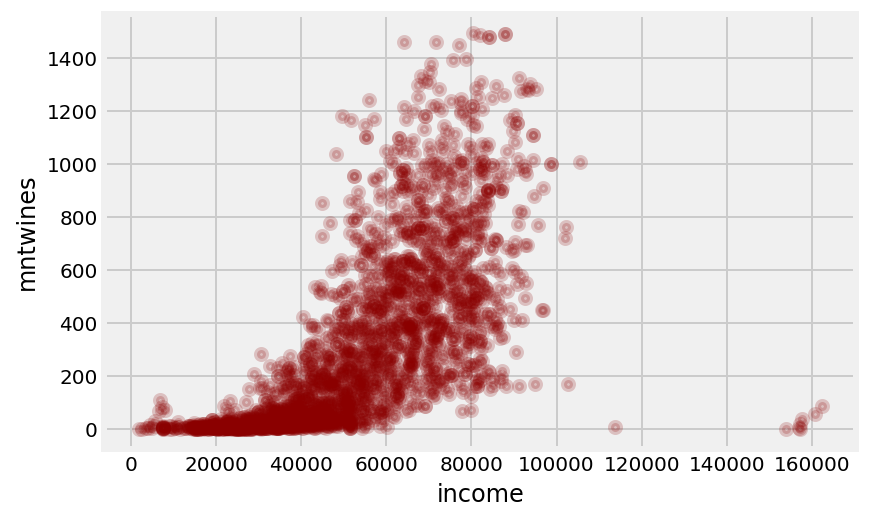

In [64]:
plt.figure(figsize=(10,8))
cp.plot.scatter('income', 'mntwines', linewidths = 3, alpha=0.2, c = 'darkred')
plt.savefig('income&wine2.png')
plt.show()

<Figure size 720x576 with 0 Axes>

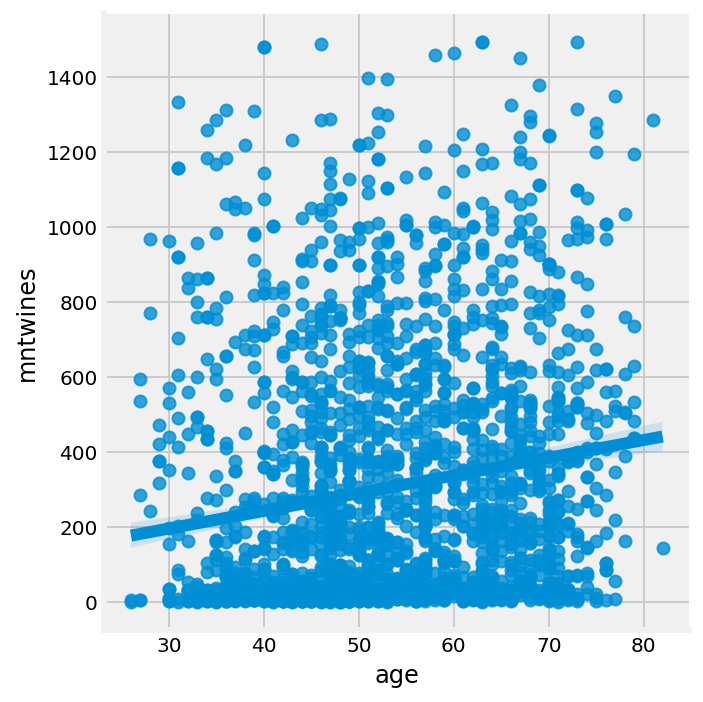

In [66]:
plt.figure(figsize=(10,8))
sns.lmplot(x='age', y='mntwines', data=cp);
plt.savefig('age&wine.png')
plt.show()

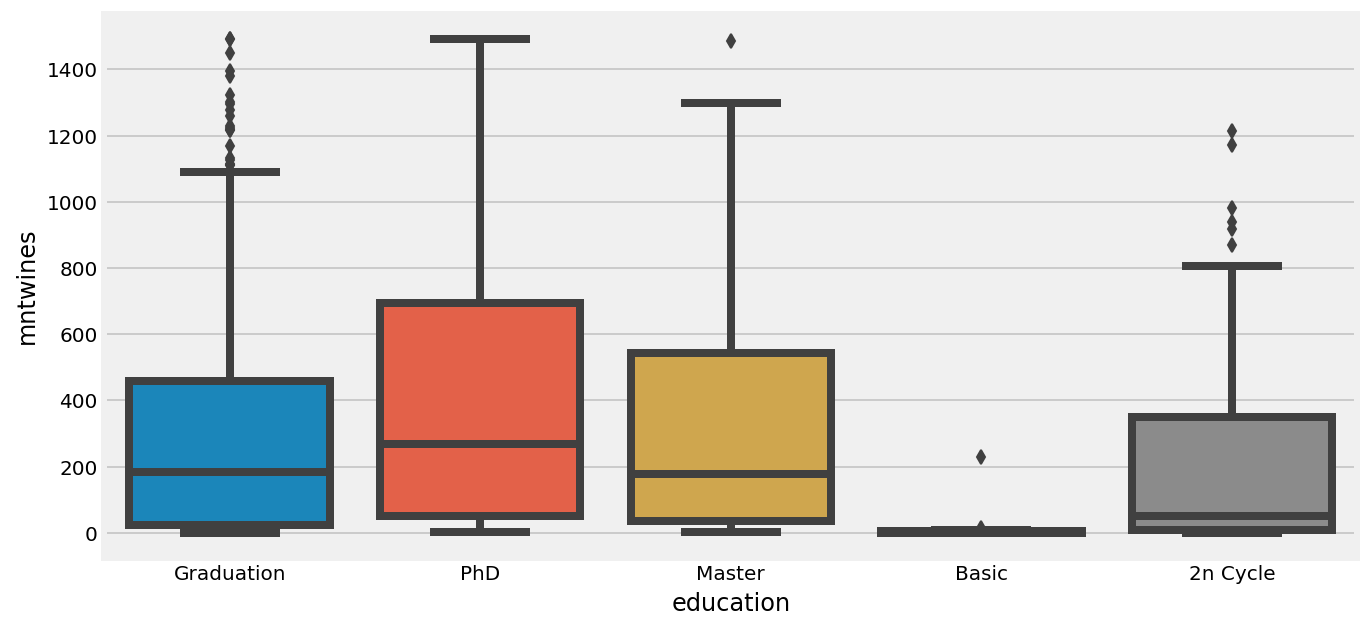

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(y='mntwines', x='education', data=cp)

plt.savefig('education&wine.png')
plt.show()

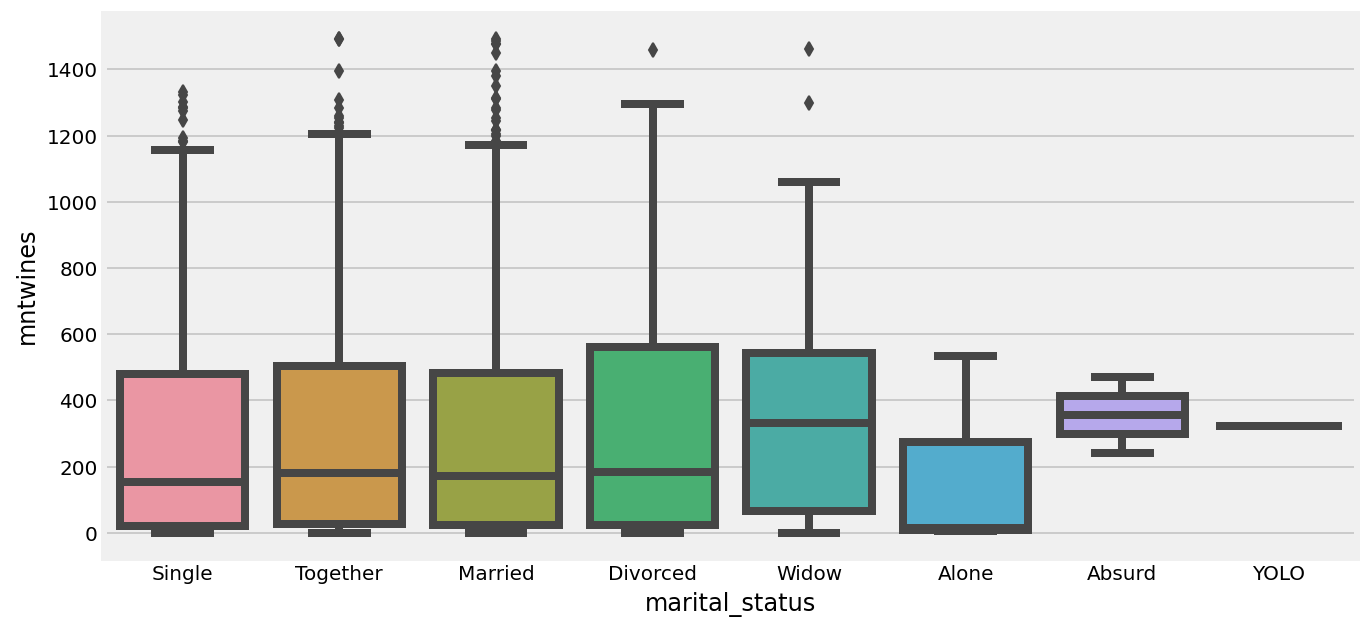

In [68]:
plt.figure(figsize=(10,5))
sns.boxplot(y='mntwines', x='marital_status', data=cp)
plt.savefig('wine&maritalstatus.png')
plt.show()

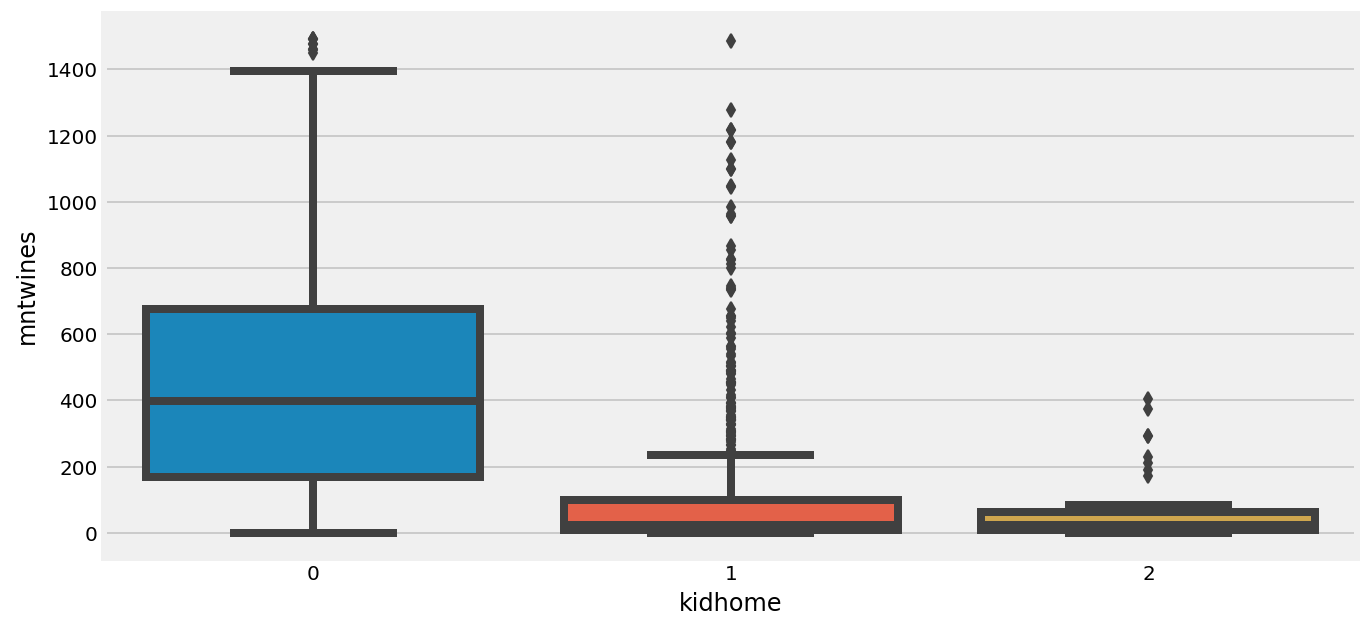

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(y='mntwines', x='kidhome', data=cp)

plt.savefig('wine&kidhome.png')
plt.show()

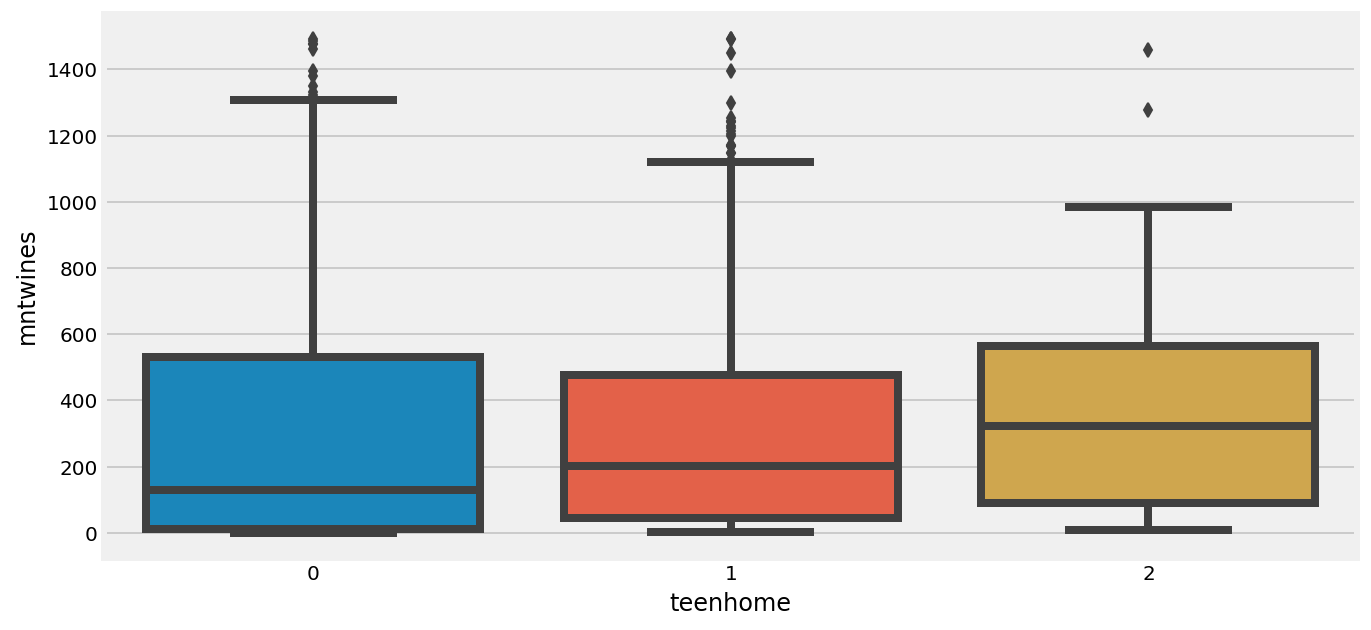

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(y='mntwines', x='teenhome', data=cp)

plt.savefig('wine&teenhome.png')
plt.show()

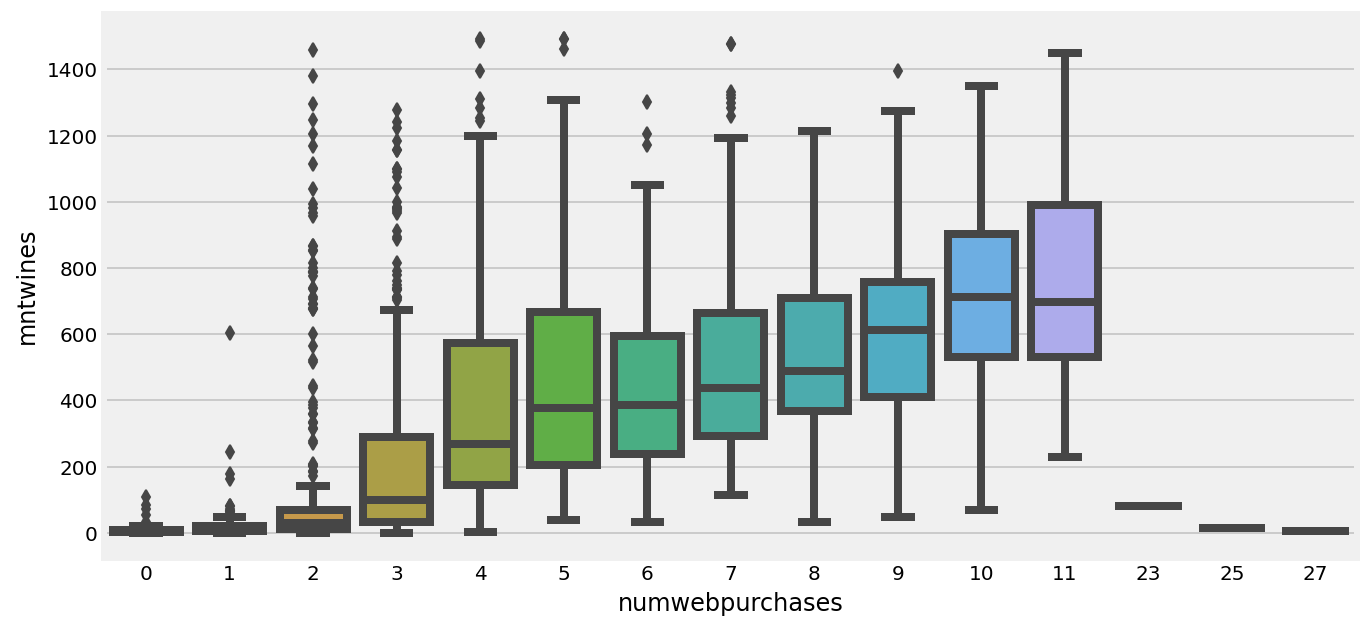

In [71]:
plt.figure(figsize=(10,5))
sns.boxplot(y='mntwines', x='numwebpurchases', data=cp)

plt.savefig('wine&webpurs.png')
plt.show()

In [72]:
#mntwines vs Product paring
cp_pp = cp.drop(labels=['education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'recency','numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'age',
       'complain', 'response', 'mntgoldprods', 'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5'], axis=1)
cp_pp.head()

,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,cmpresponse,mntwinespend
0,635,88,546,172,88,none,4
1,11,1,6,2,1,none,1
2,426,49,127,111,21,none,3
3,11,4,20,10,3,none,1
4,173,43,118,46,27,none,3


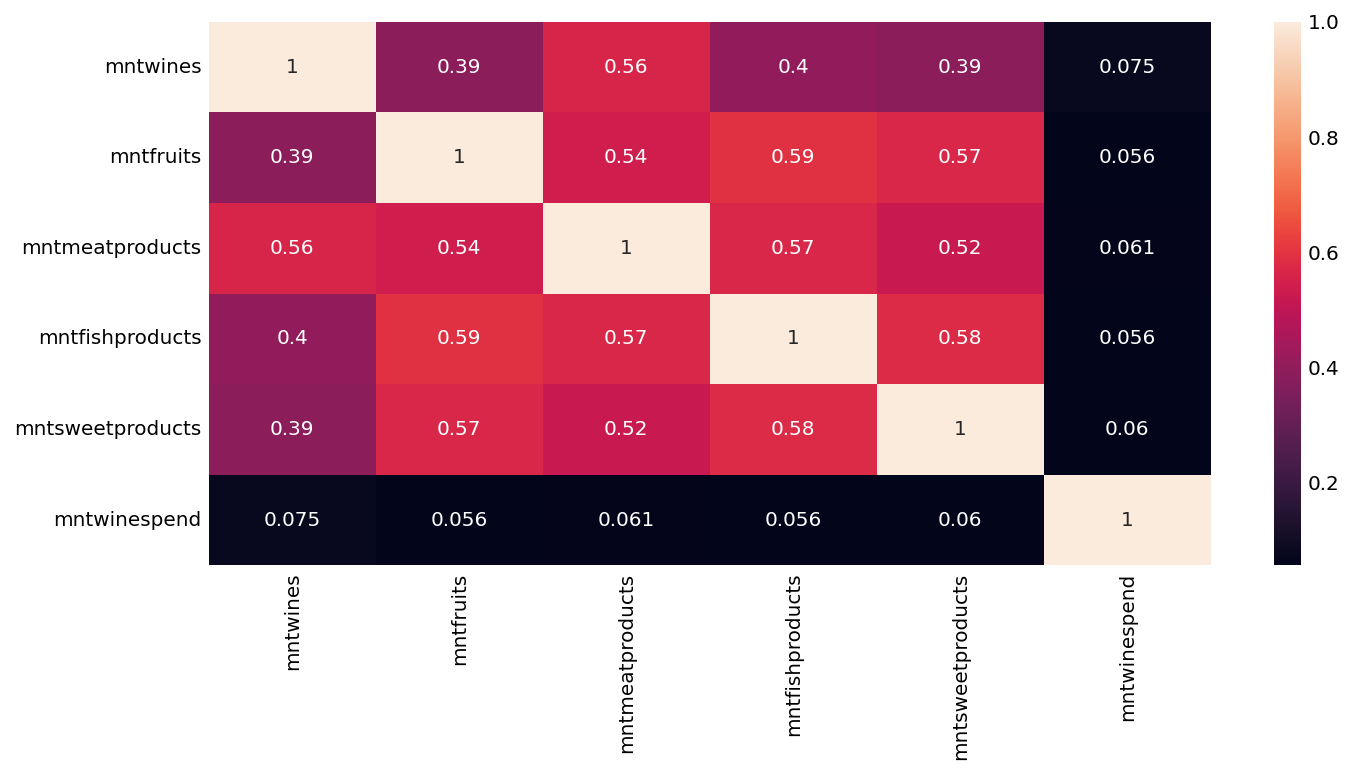

In [73]:
plt.figure(figsize=(10,5))
sns.heatmap(cp_pp.corr(), annot=True)
plt.savefig('wine&productparing.png')
plt.show()

In [74]:
#mntwines vs campaigns
cp_cmp = cp.drop(labels=['education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth',
       'complain', 'response', 'age'], axis=1)
cp_cmp.head()

,mntwines,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,cmpresponse,mntwinespend
0,635,0,0,0,0,0,none,4
1,11,0,0,0,0,0,none,1
2,426,0,0,0,0,0,none,3
3,11,0,0,0,0,0,none,1
4,173,0,0,0,0,0,none,3


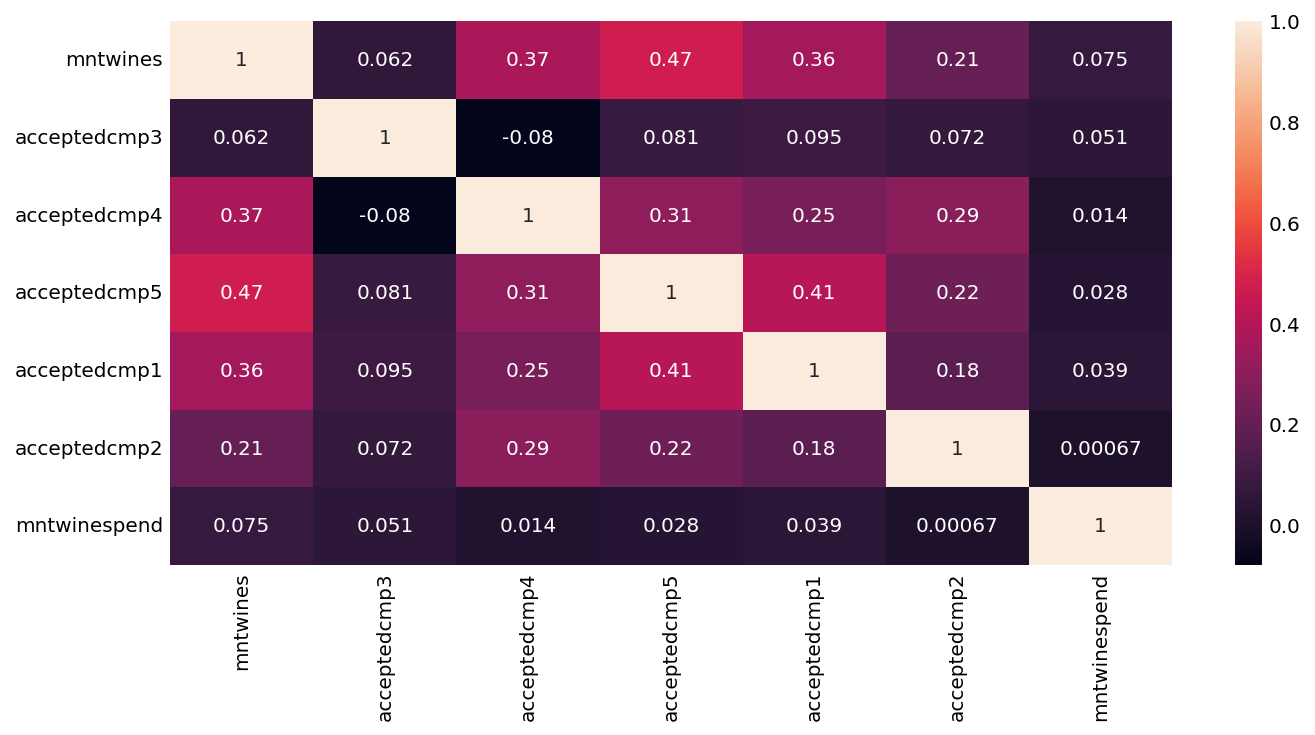

In [75]:
plt.figure(figsize=(10,5))
sns.heatmap(cp_cmp.corr(), annot=True)
plt.savefig('wine&cmp.png')
plt.show()

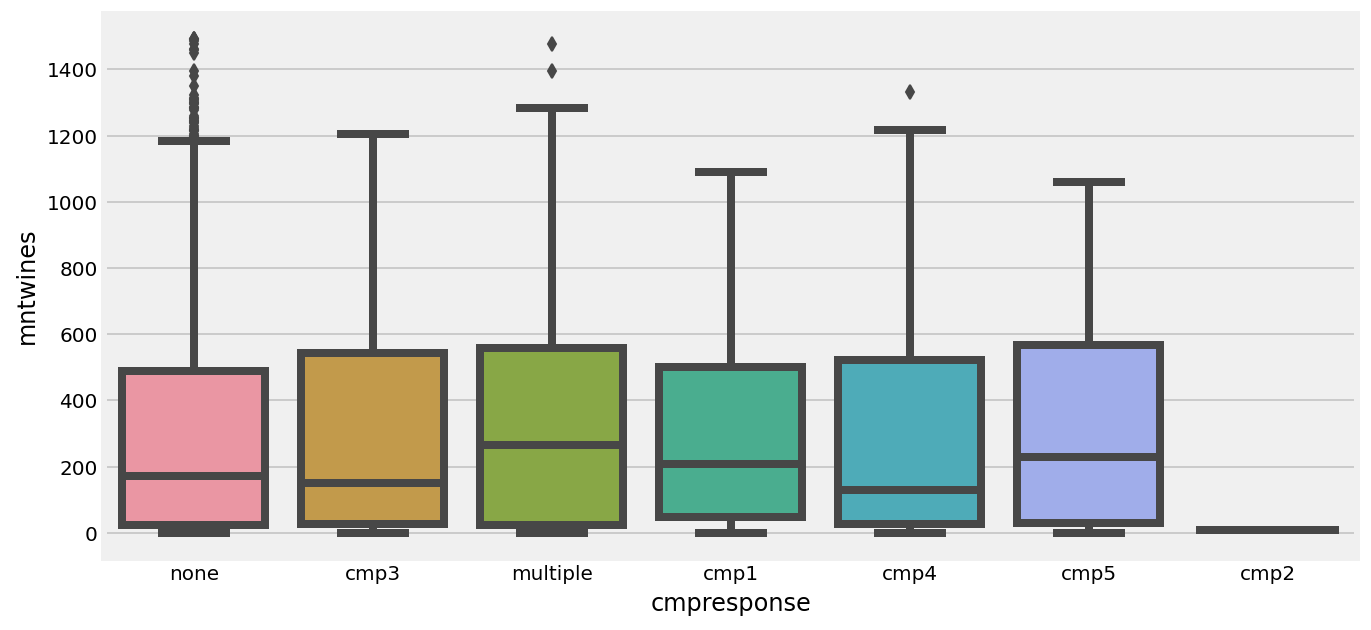

In [76]:
plt.figure(figsize=(10,5))
sns.boxplot(y='mntwines', x='cmpresponse', data=cp)

plt.savefig('wine&cmpresponse.png')
plt.show()

<Figure size 720x576 with 0 Axes>

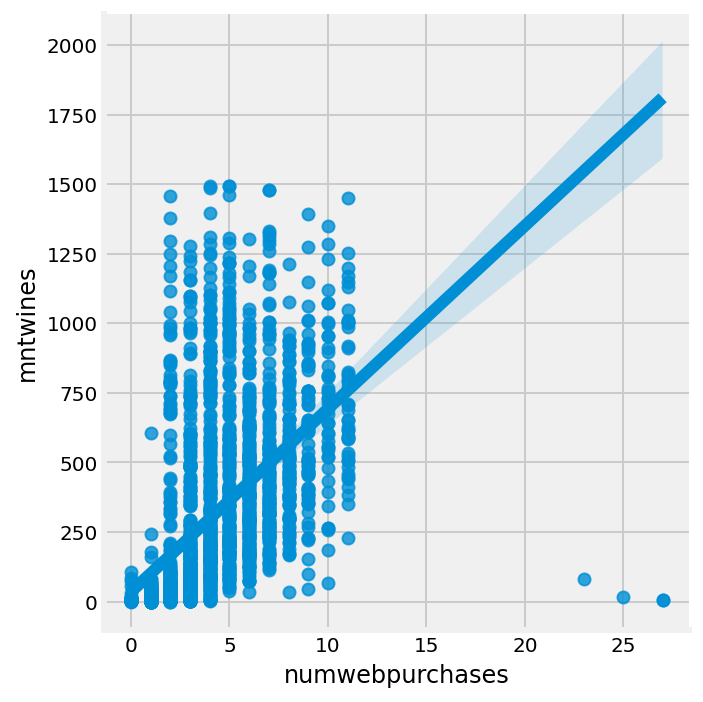

In [77]:
plt.figure(figsize=(10,8))
sns.lmplot(x='numwebpurchases', y='mntwines', data=cp);
plt.savefig('webpurs&wine.png')
plt.show()

<Figure size 720x576 with 0 Axes>

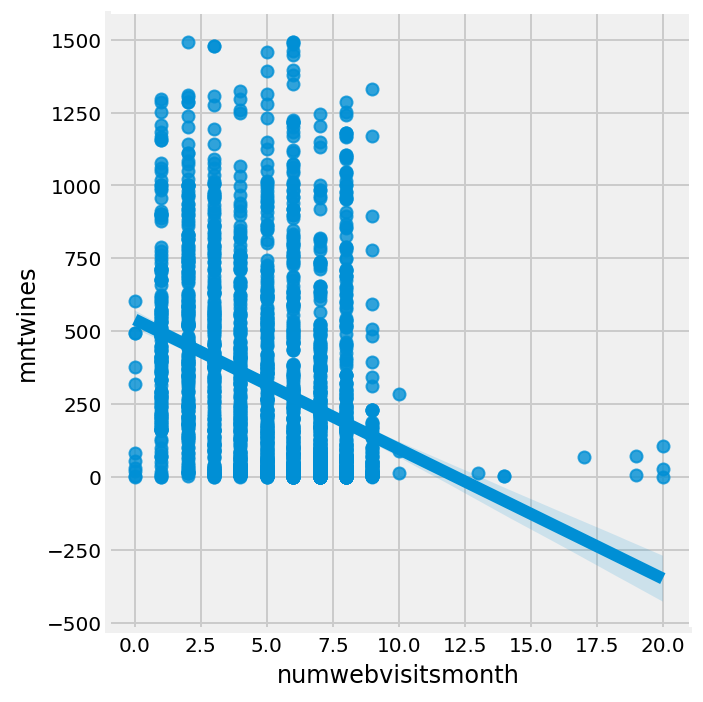

In [78]:
plt.figure(figsize=(10,8))
sns.lmplot(x='numwebvisitsmonth', y='mntwines', data=cp);
plt.savefig('webvisits&wine.png')
plt.show()

<Figure size 720x576 with 0 Axes>

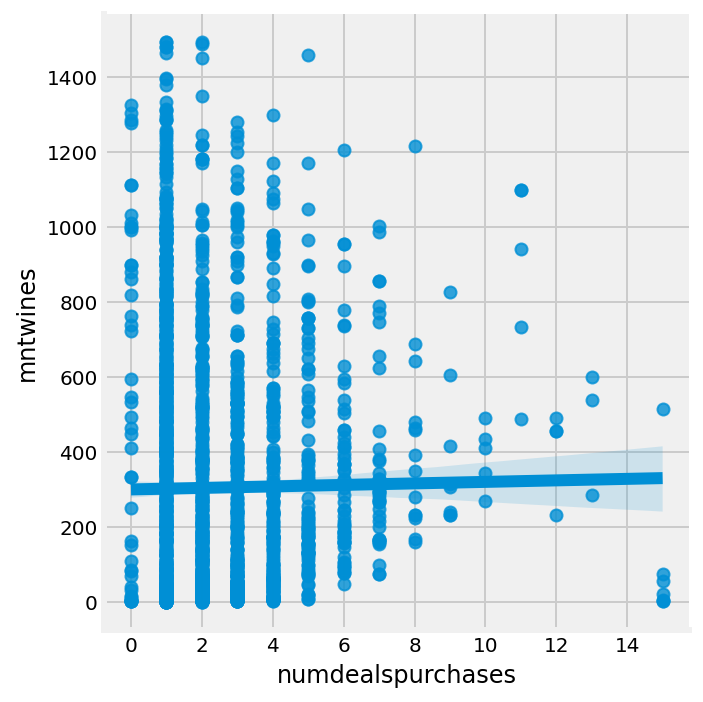

In [79]:
plt.figure(figsize=(10,8))
sns.lmplot(x='numdealspurchases', y='mntwines', data=cp);
plt.savefig('dealpurs&wine.png')
plt.show()

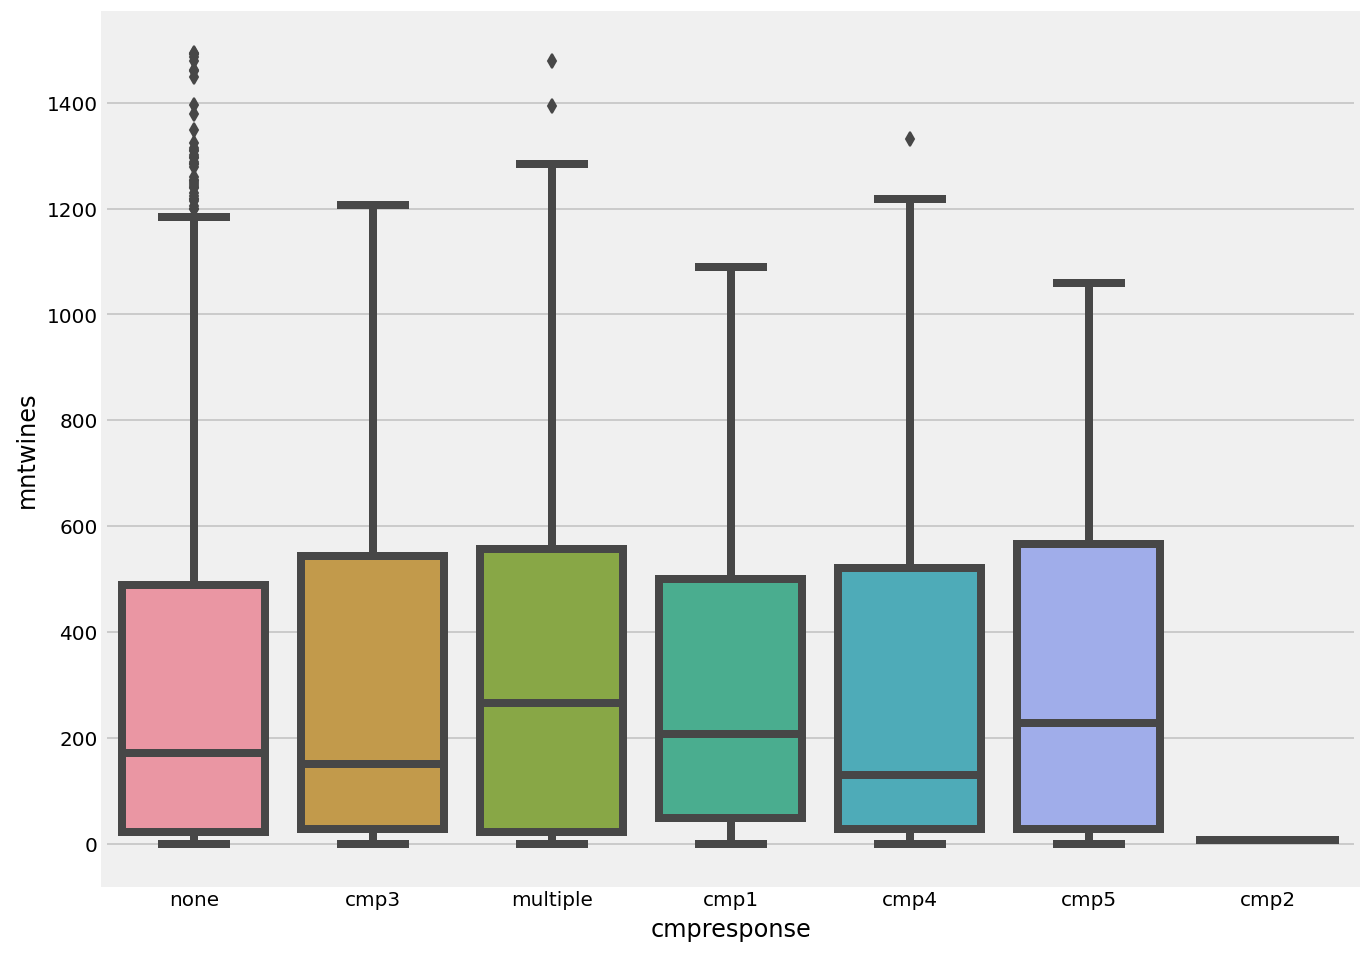

In [80]:
plt.figure(figsize=(10,8))
sns.boxplot(x='cmpresponse', y='mntwines', data=cp);
plt.savefig('mntwinespend&cmpresponse.png')
plt.show()

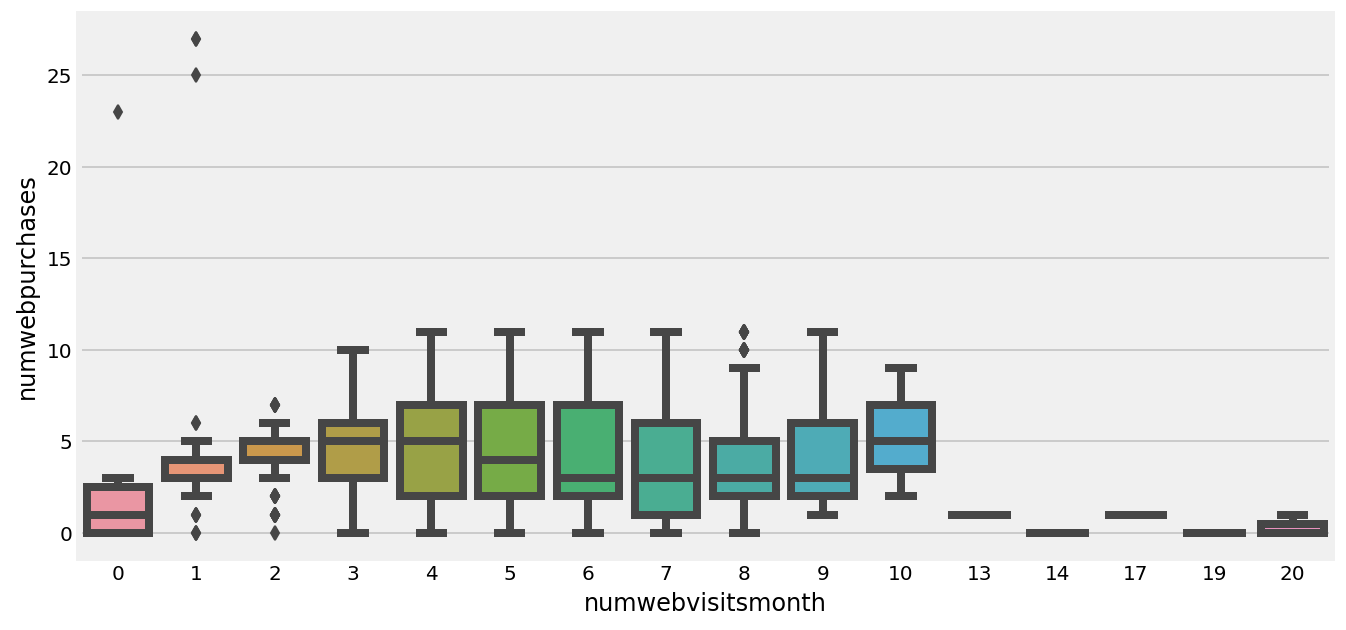

In [81]:
plt.figure(figsize=(10,5))
sns.boxplot(y='numwebpurchases', x='numwebvisitsmonth', data=cp)
plt.savefig('webvisit&webpurchase.png')
plt.show()

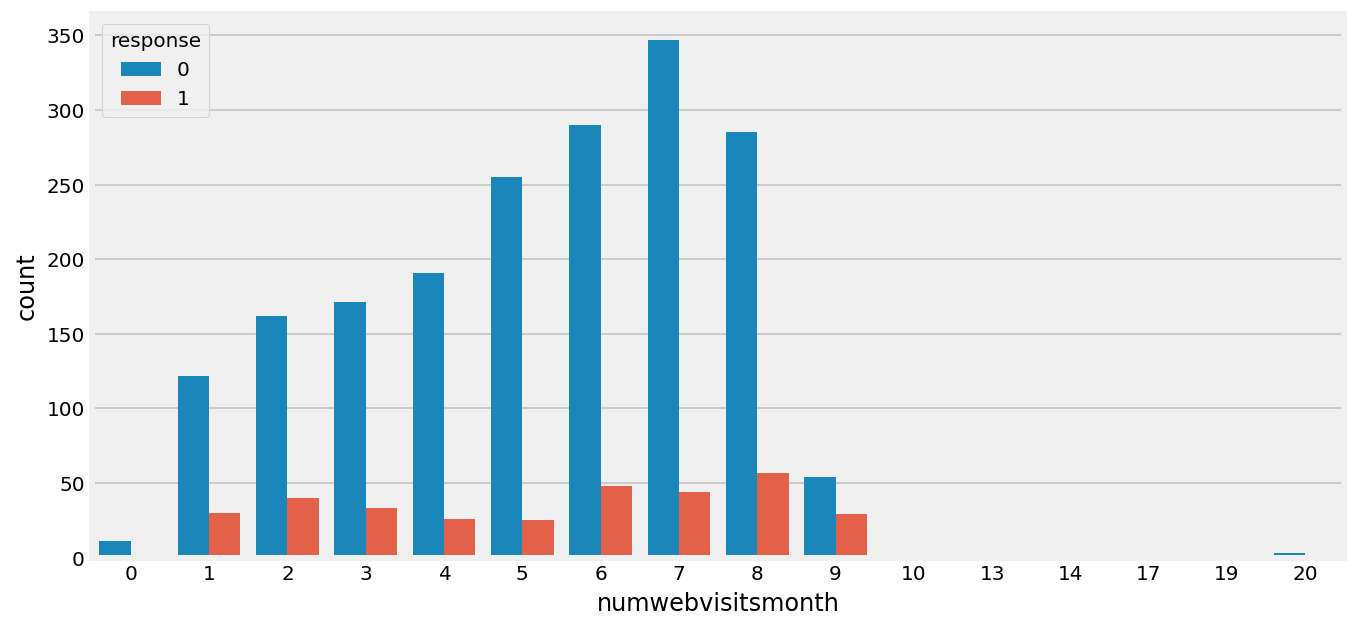

In [82]:
plt.figure(figsize=(10,5))
sns.countplot( x='numwebvisitsmonth', data=cp,hue='response')
plt.savefig('webvisit&response.png')
plt.show()

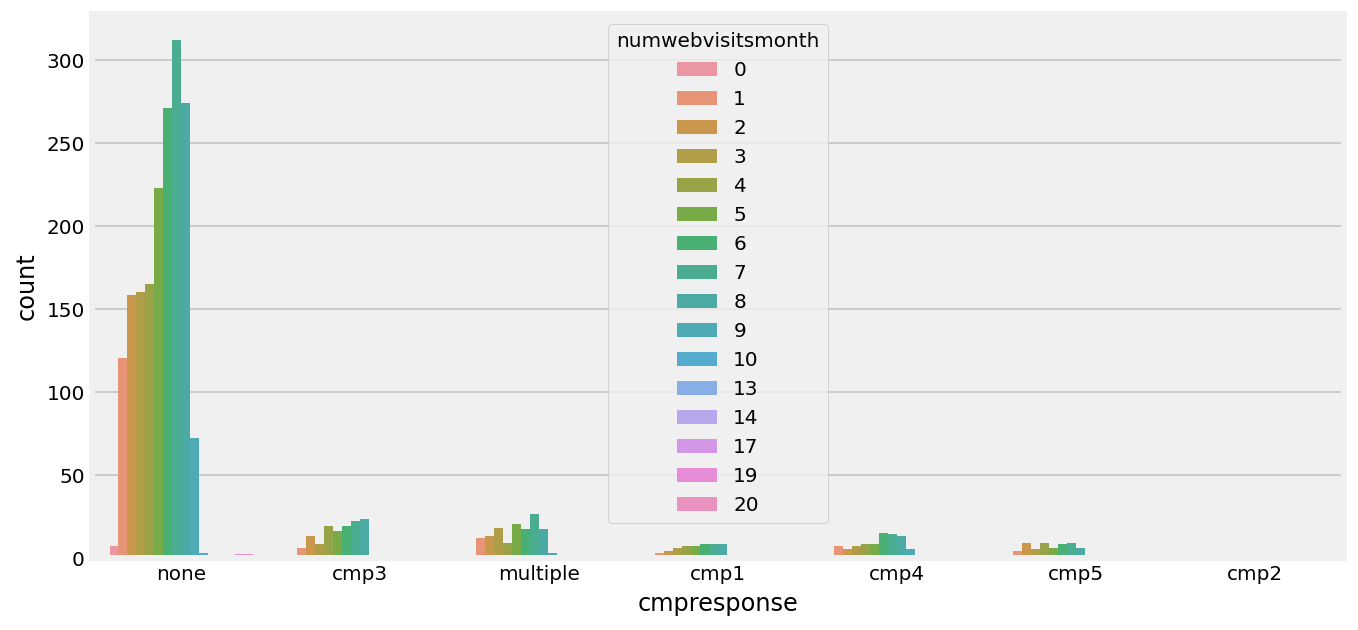

In [83]:
plt.figure(figsize=(10,5))
sns.countplot( x='cmpresponse', data=cp,hue='numwebvisitsmonth')
plt.savefig('webvisit&cmpresponse.png')
plt.show()

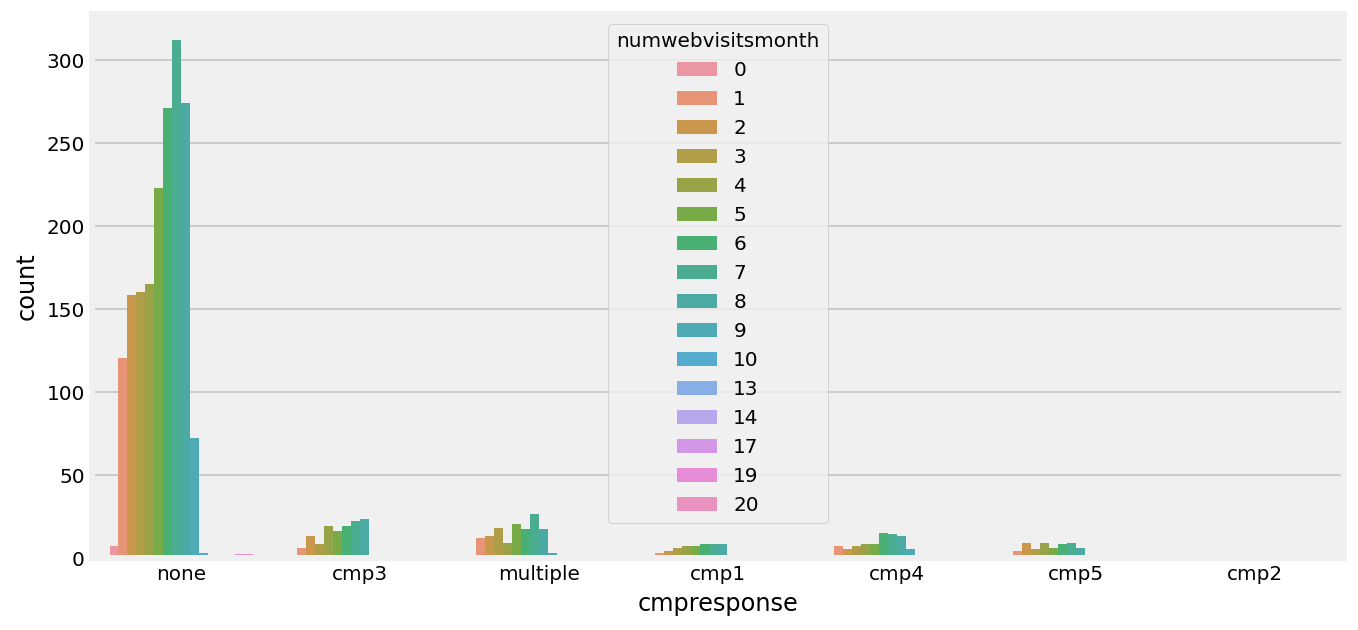

In [84]:
plt.figure(figsize=(10,5))
sns.countplot( x='cmpresponse', data=cp,hue='numwebvisitsmonth')
plt.savefig('webvisit&cmpresponse.png')
plt.show()

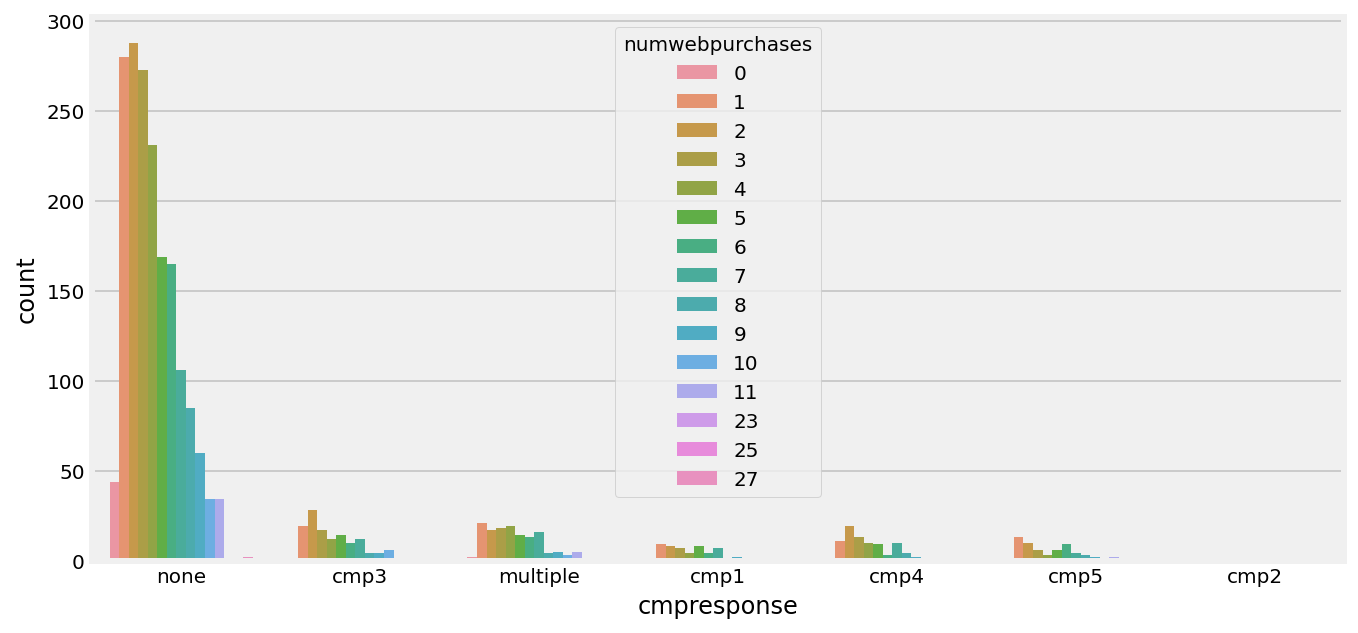

In [85]:
plt.figure(figsize=(10,5))
sns.countplot( x='cmpresponse', data=cp,hue='numwebpurchases')
plt.savefig('webpurs&cmpresponse.png')
plt.show()

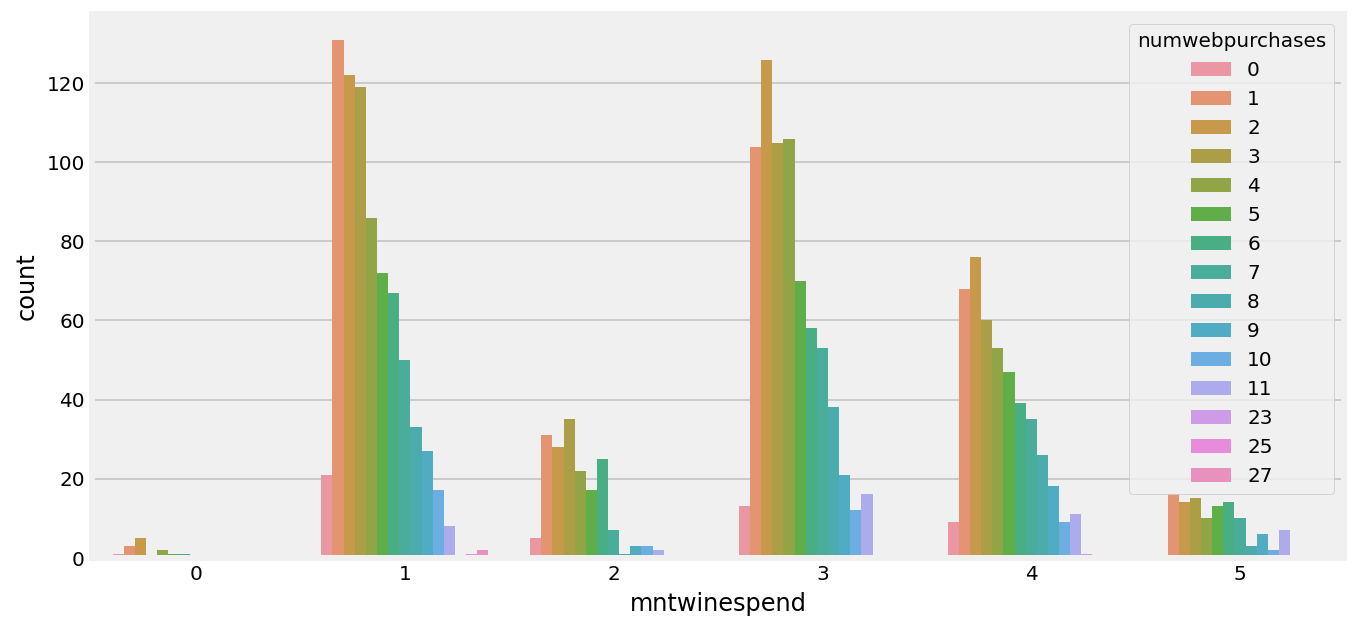

In [86]:
plt.figure(figsize=(10,5))
sns.countplot( x='mntwinespend', data=cp,hue='numwebpurchases')
plt.savefig('webpurs&mntwinespend.png')
plt.show()

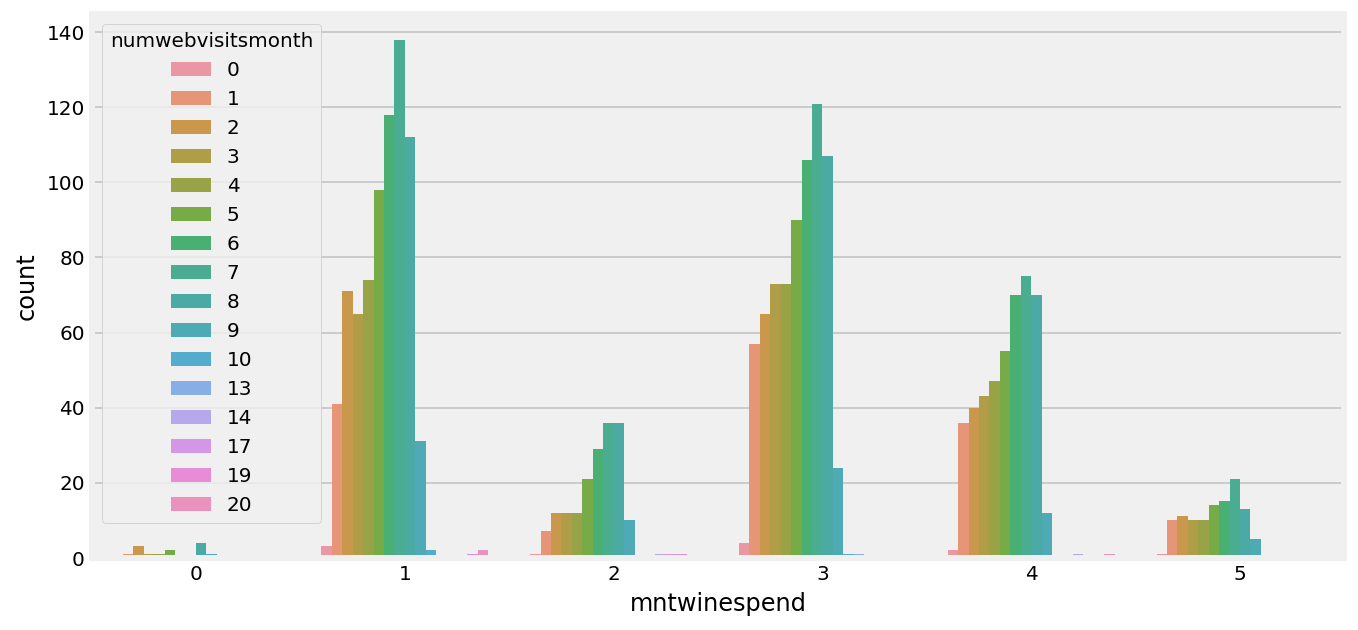

In [87]:
plt.figure(figsize=(10,5))
sns.countplot( x='mntwinespend', data=cp,hue='numwebvisitsmonth')
plt.savefig('webvisit&mntwinespend.png')
plt.show()

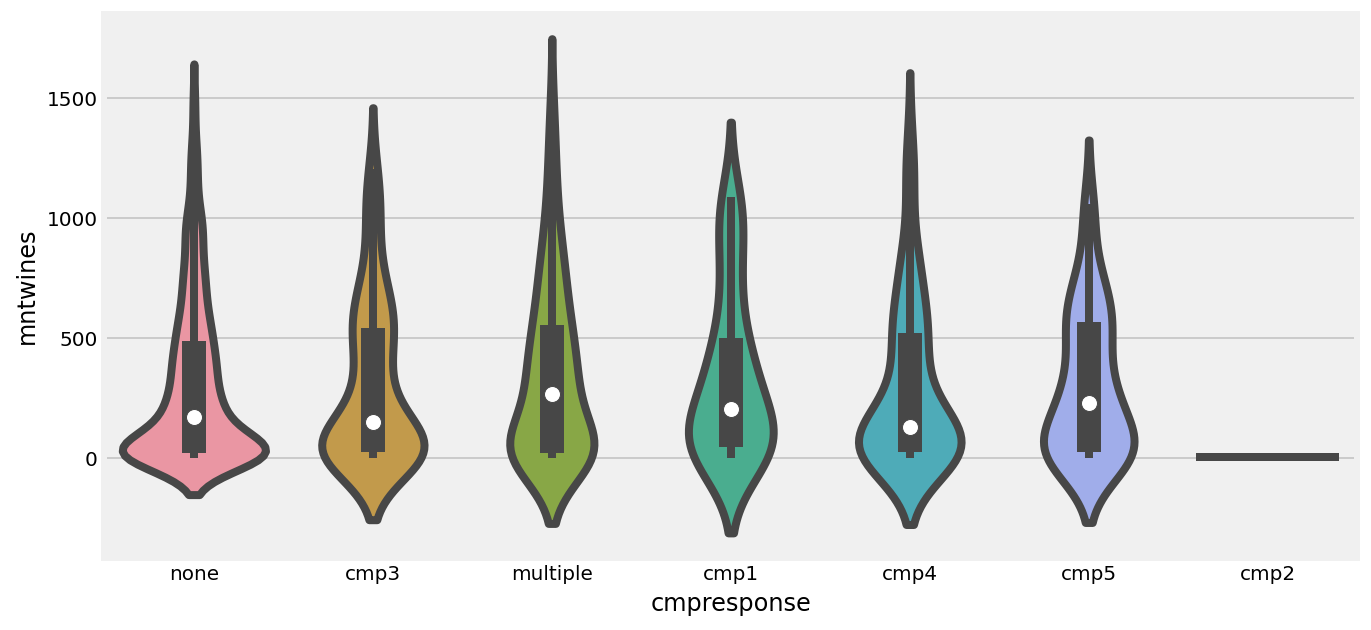

In [88]:
plt.figure(figsize=(10,5))
sns.violinplot(y='mntwines', x='cmpresponse', data=cp)
plt.savefig('cmpresponse&mntwines.png')
plt.show()

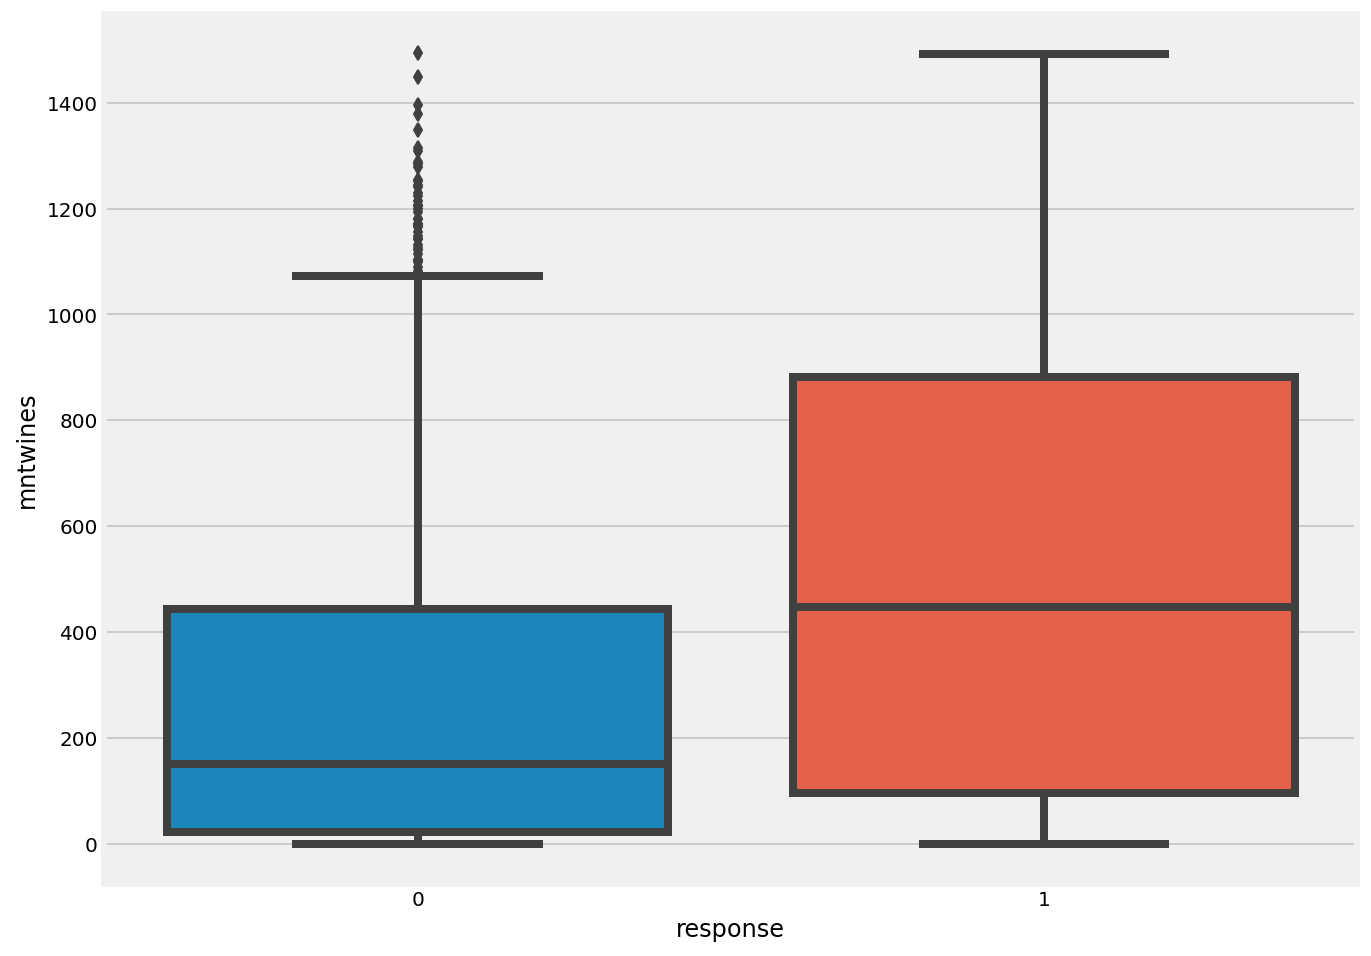

In [89]:
plt.figure(figsize=(10,8))
sns.boxplot(x='response', y='mntwines', data=cp);
plt.savefig('mntwines&response.png')
plt.show()

# Now we want to compare personality of customers who responsed to current campaigns versus those who didn't

In [90]:
cp.cmpresponse.value_counts(normalize=True)

none        0.793907
multiple    0.061380
cmp3        0.057796
cmp4        0.037186
cmp5        0.025986
cmp1        0.023297
cmp2        0.000448
Name: cmpresponse, dtype: float64

In [91]:
noresponse = cp.loc[cp['cmpresponse']=='none']
noresponse.shape

(1772, 27)

In [92]:
responsed = cp.loc[cp['cmpresponse']!='none']
responsed.shape

(460, 27)

In [93]:
noresponse.describe().T

,count,mean,std,min,25%,50%,75%,max
income,1772.0,51680.676354,21219.467568,1730.0,35233.5,51342.0,67445.0,162397.0
kidhome,1772.0,0.450903,0.541204,0.0,0.0,0.0,1.0,2.0
teenhome,1772.0,0.514673,0.546339,0.0,0.0,0.0,1.0,2.0
recency,1772.0,48.931151,28.958328,0.0,24.0,49.0,74.0,99.0
mntwines,1772.0,300.014108,335.831475,0.0,23.0,172.0,489.5,1493.0
mntfruits,1772.0,26.021445,39.658019,0.0,1.0,8.0,33.0,199.0
mntmeatproducts,1772.0,163.865124,223.133332,1.0,16.0,65.0,223.0,1725.0
mntfishproducts,1772.0,36.303612,53.595409,0.0,2.0,12.0,46.0,259.0
mntsweetproducts,1772.0,26.954289,41.499732,0.0,1.0,8.0,33.0,263.0
mntgoldprods,1772.0,43.143905,51.037416,0.0,8.0,24.0,56.0,362.0


# Web purchases vs web visits

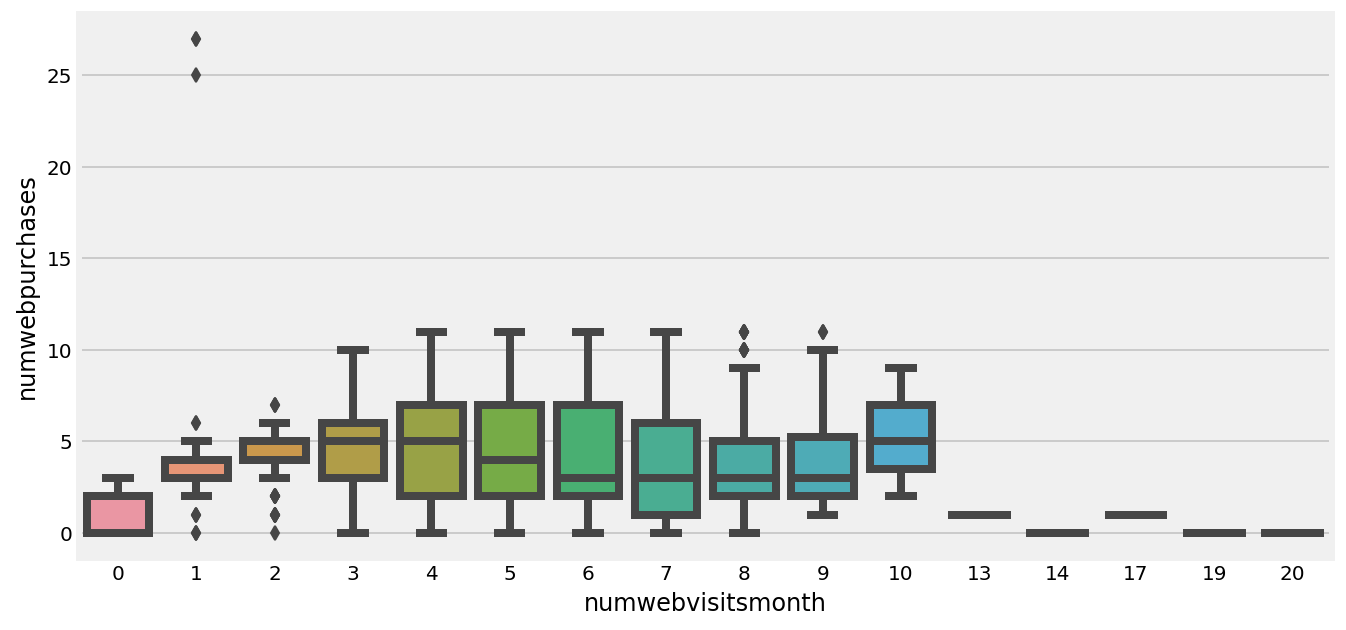

In [94]:
plt.figure(figsize=(10,5))
sns.boxplot(y='numwebpurchases', x='numwebvisitsmonth', data=noresponse)
plt.savefig('noresponse_webvisit&webpurchase.png')
plt.show()

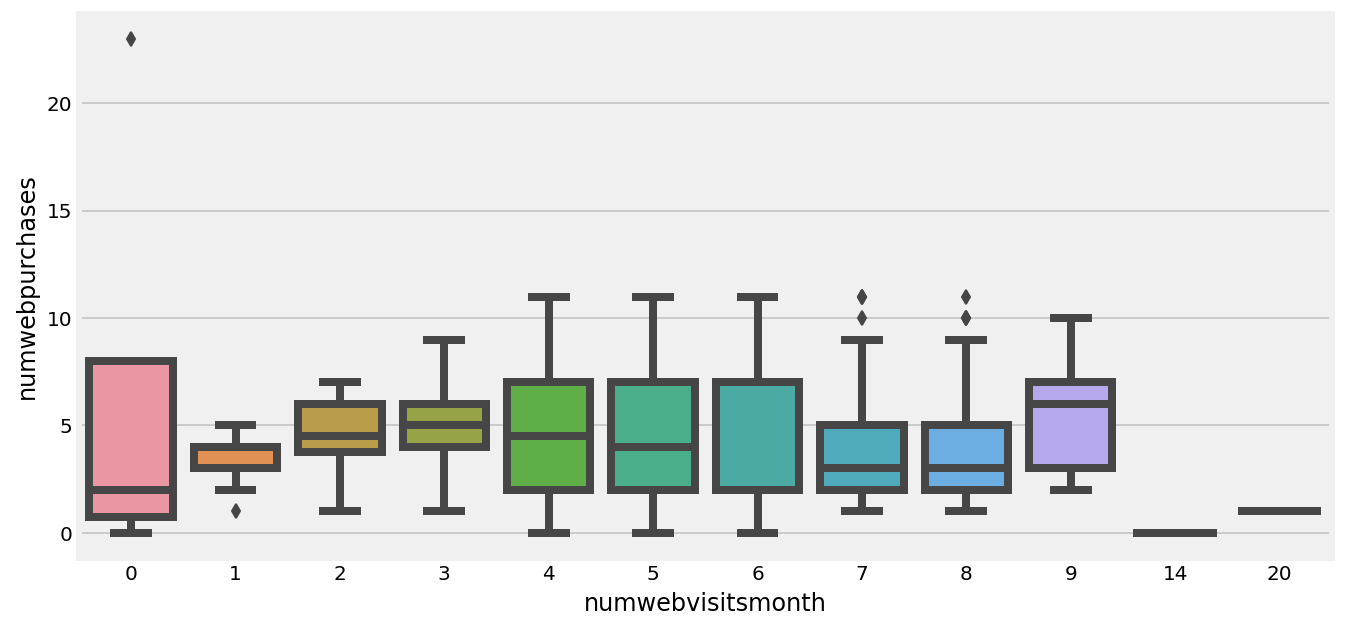

In [95]:
plt.figure(figsize=(10,5))
sns.boxplot(y='numwebpurchases', x='numwebvisitsmonth', data=responsed)
plt.savefig('responsed_webvisit&webpurchase.png')
plt.show()

# Amount spend on wines in range

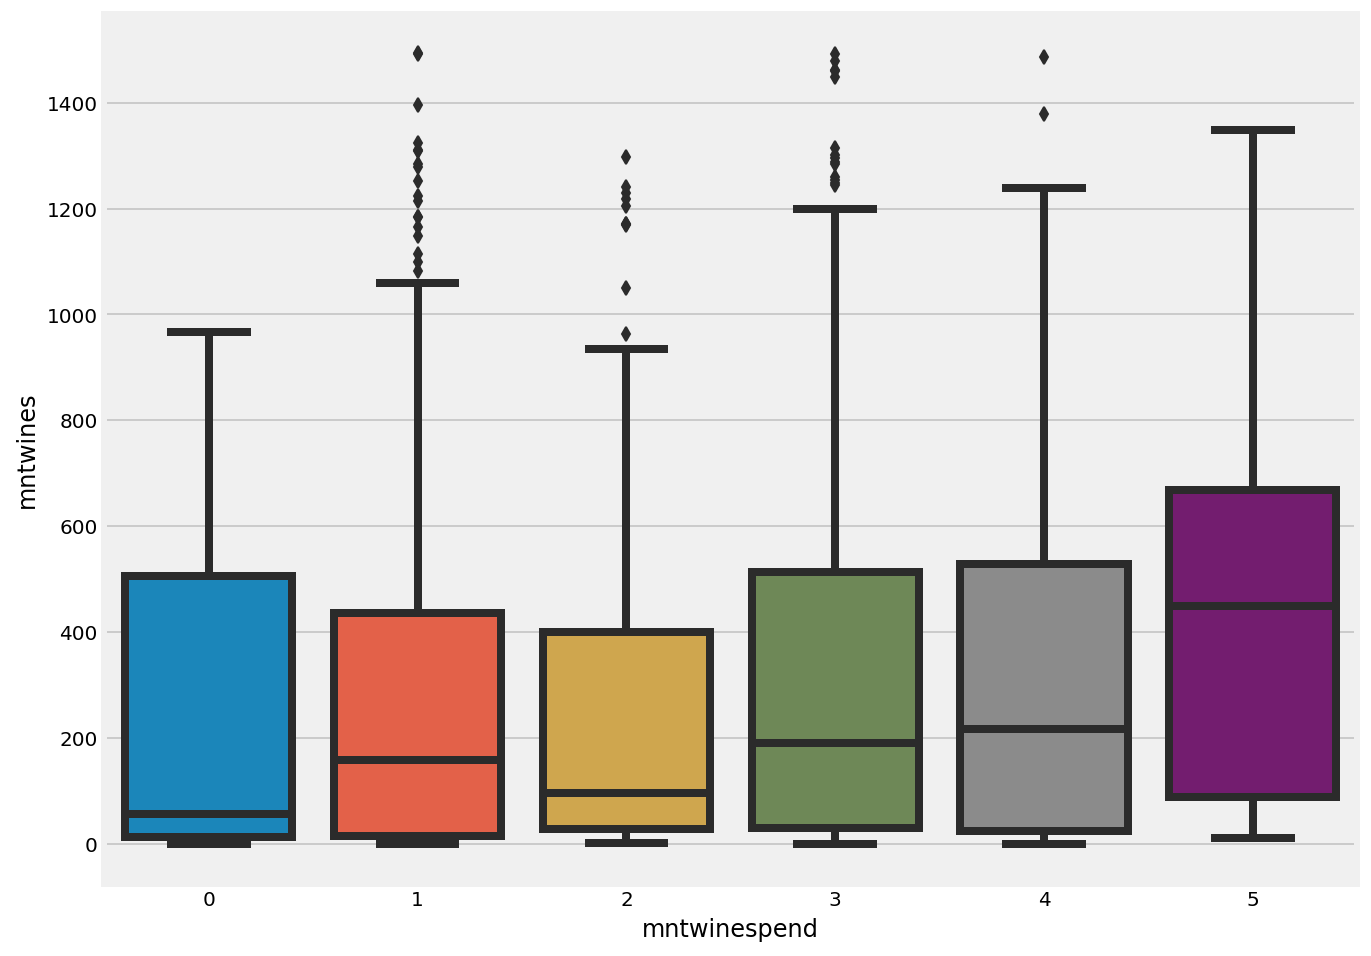

In [96]:
plt.figure(figsize=(10,8))
sns.boxplot(x='mntwinespend', y='mntwines', data=noresponse);
plt.savefig('noresponse_mntwinespend&mntwines.png')
plt.show()

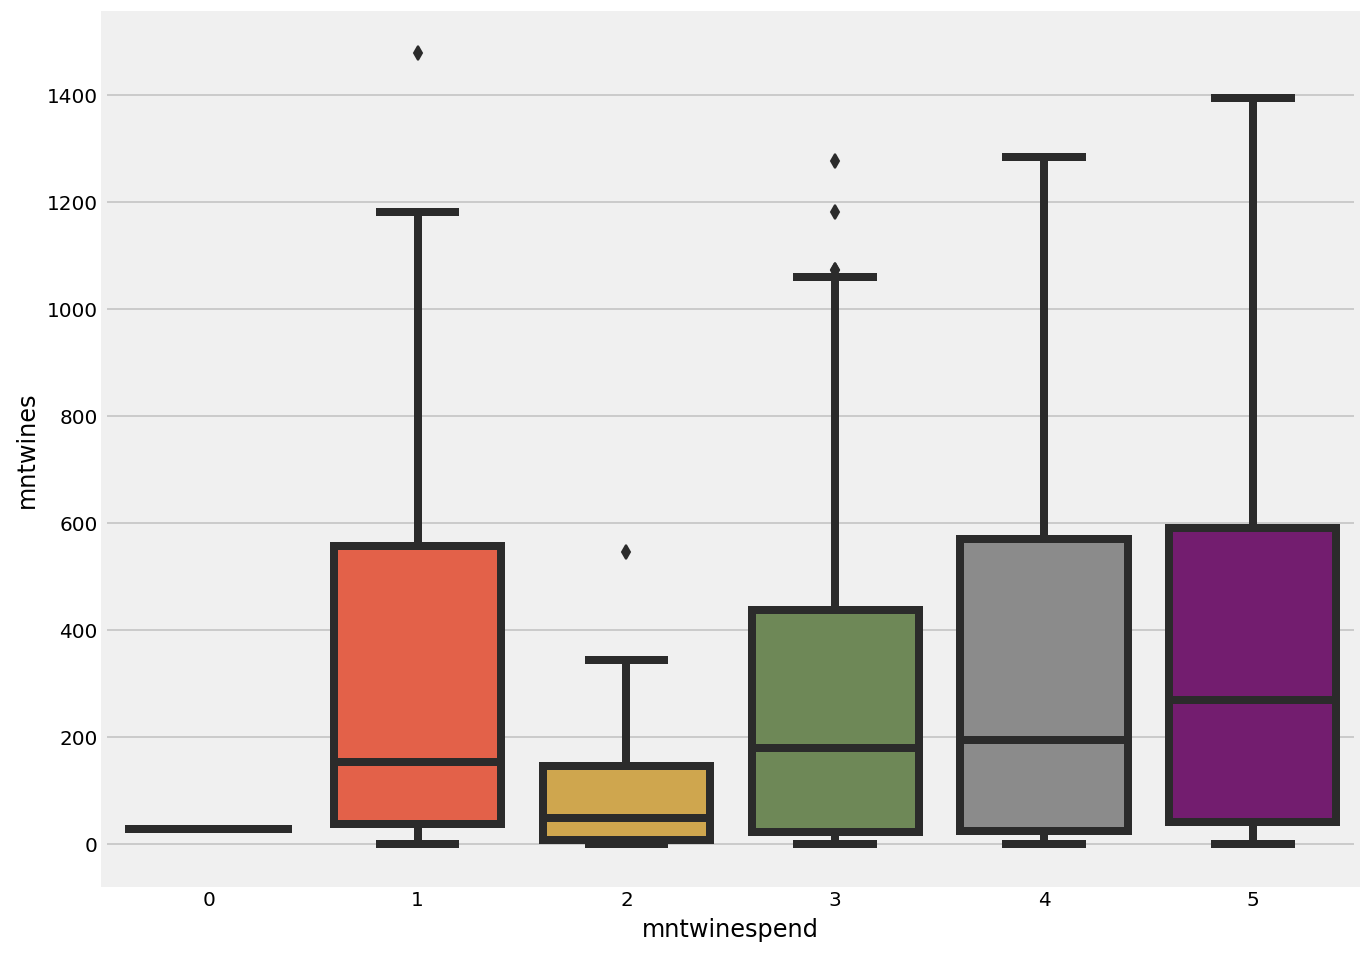

In [97]:
plt.figure(figsize=(10,8))
sns.boxplot(x='mntwinespend', y='mntwines', data=responsed);
plt.savefig('responsed_mntwinespend&mntwines.png')
plt.show()

# Amount spend on wines versus complain 

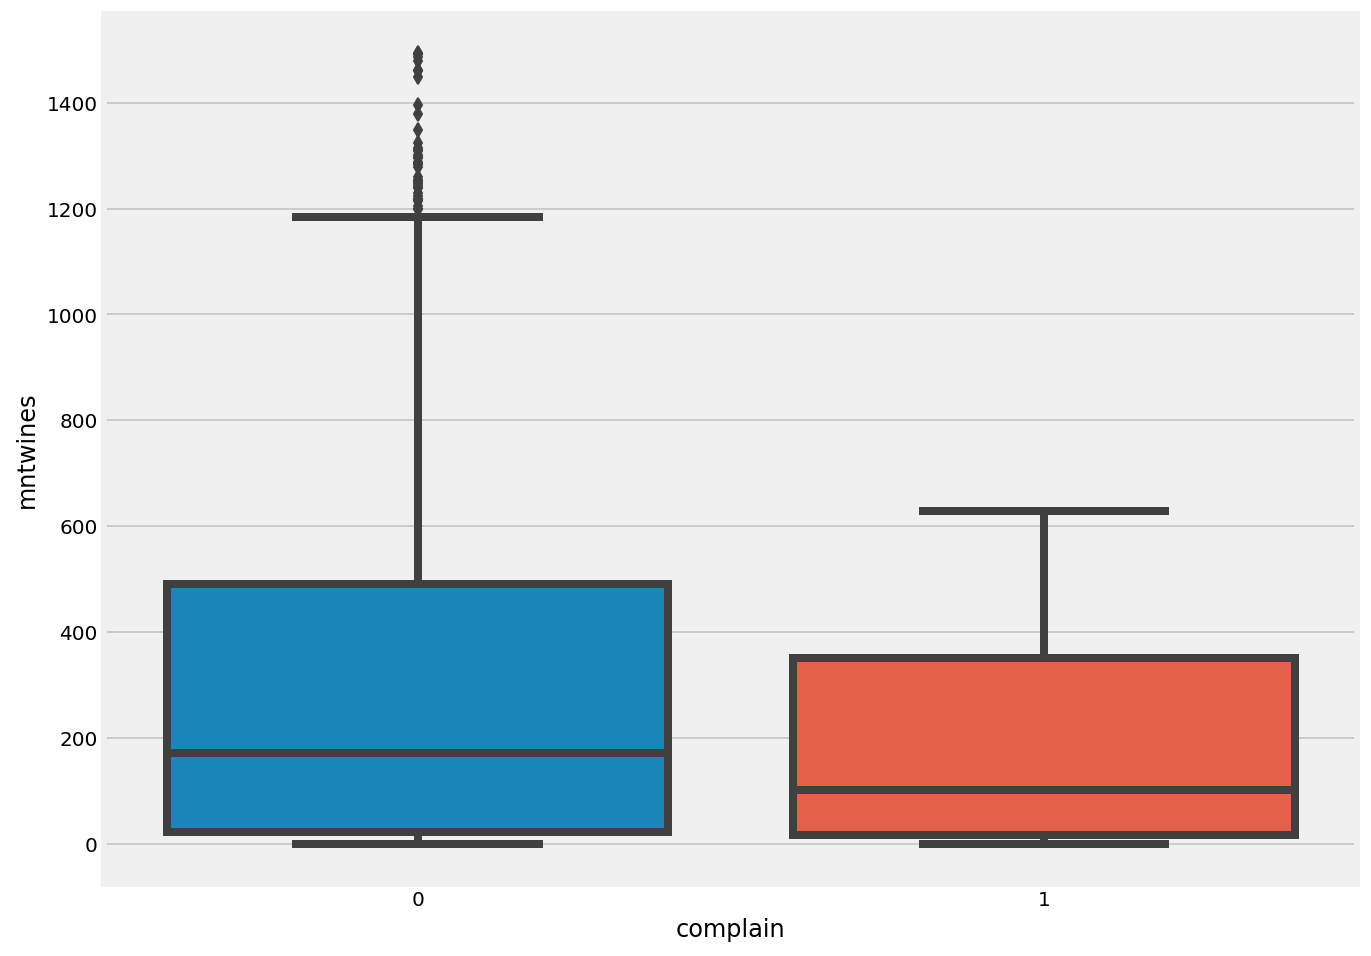

In [98]:
plt.figure(figsize=(10,8))
sns.boxplot(x='complain', y='mntwines', data=noresponse);
plt.savefig('noresponse_mntwines&complain.png')
plt.show()

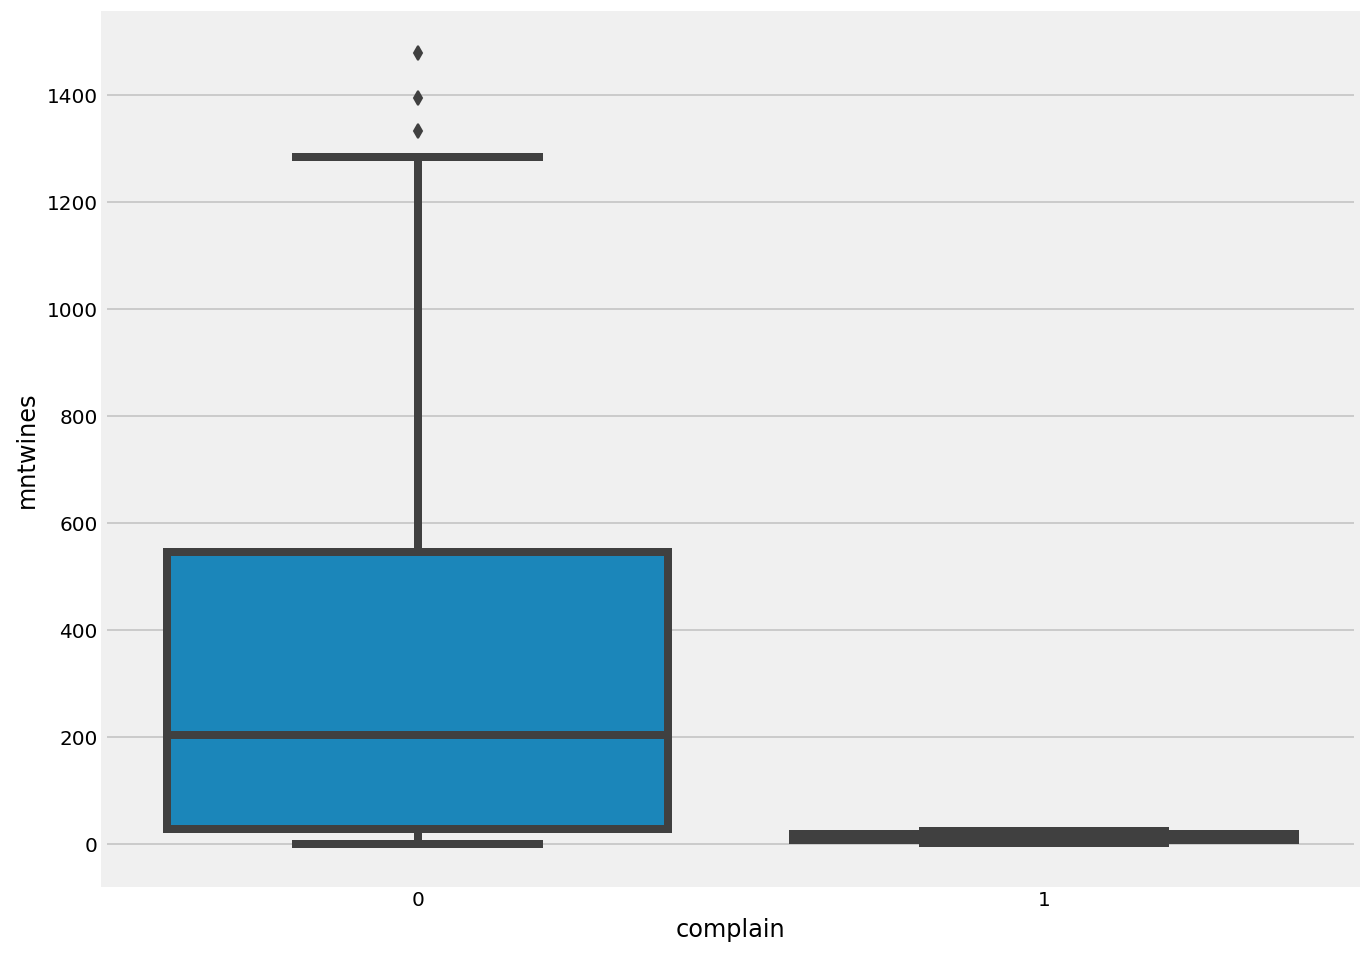

In [99]:
plt.figure(figsize=(10,8))
sns.boxplot(x='complain', y='mntwines', data=responsed);
plt.savefig('responsed_mntwines&complain.png')
plt.show()

# Web purchases & amount spend on wines

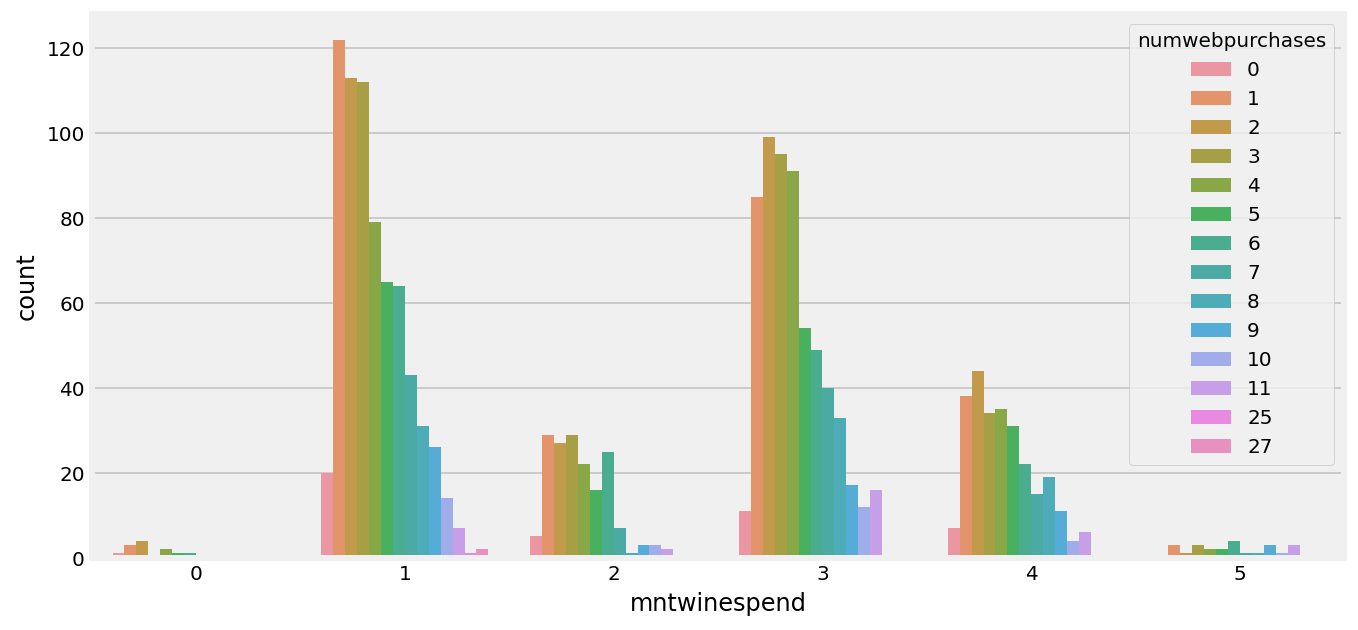

In [100]:
plt.figure(figsize=(10,5))
sns.countplot( x='mntwinespend', data=noresponse,hue='numwebpurchases')
plt.savefig('noresponse_webpurs&mntwinespend.png')
plt.show()

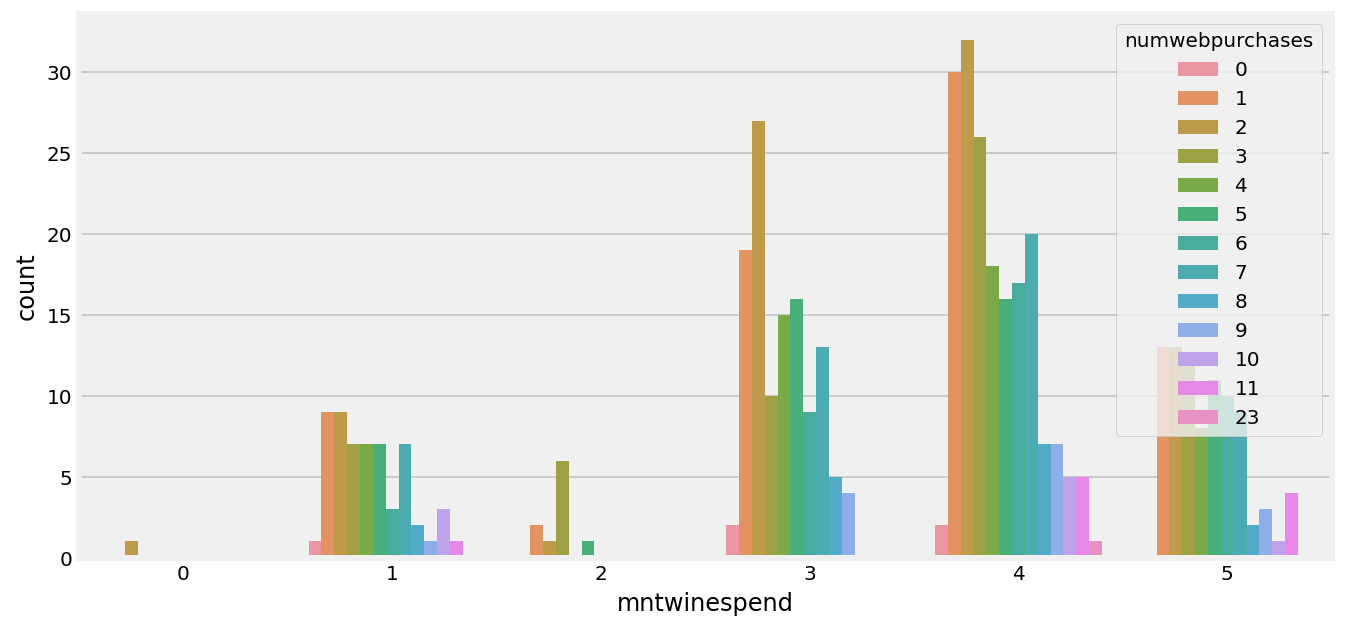

In [101]:
plt.figure(figsize=(10,5))
sns.countplot( x='mntwinespend', data=responsed,hue='numwebpurchases')
plt.savefig('responsed_webpurs&mntwinespend.png')
plt.show()

# Number of deal purchases & amount spend on wines

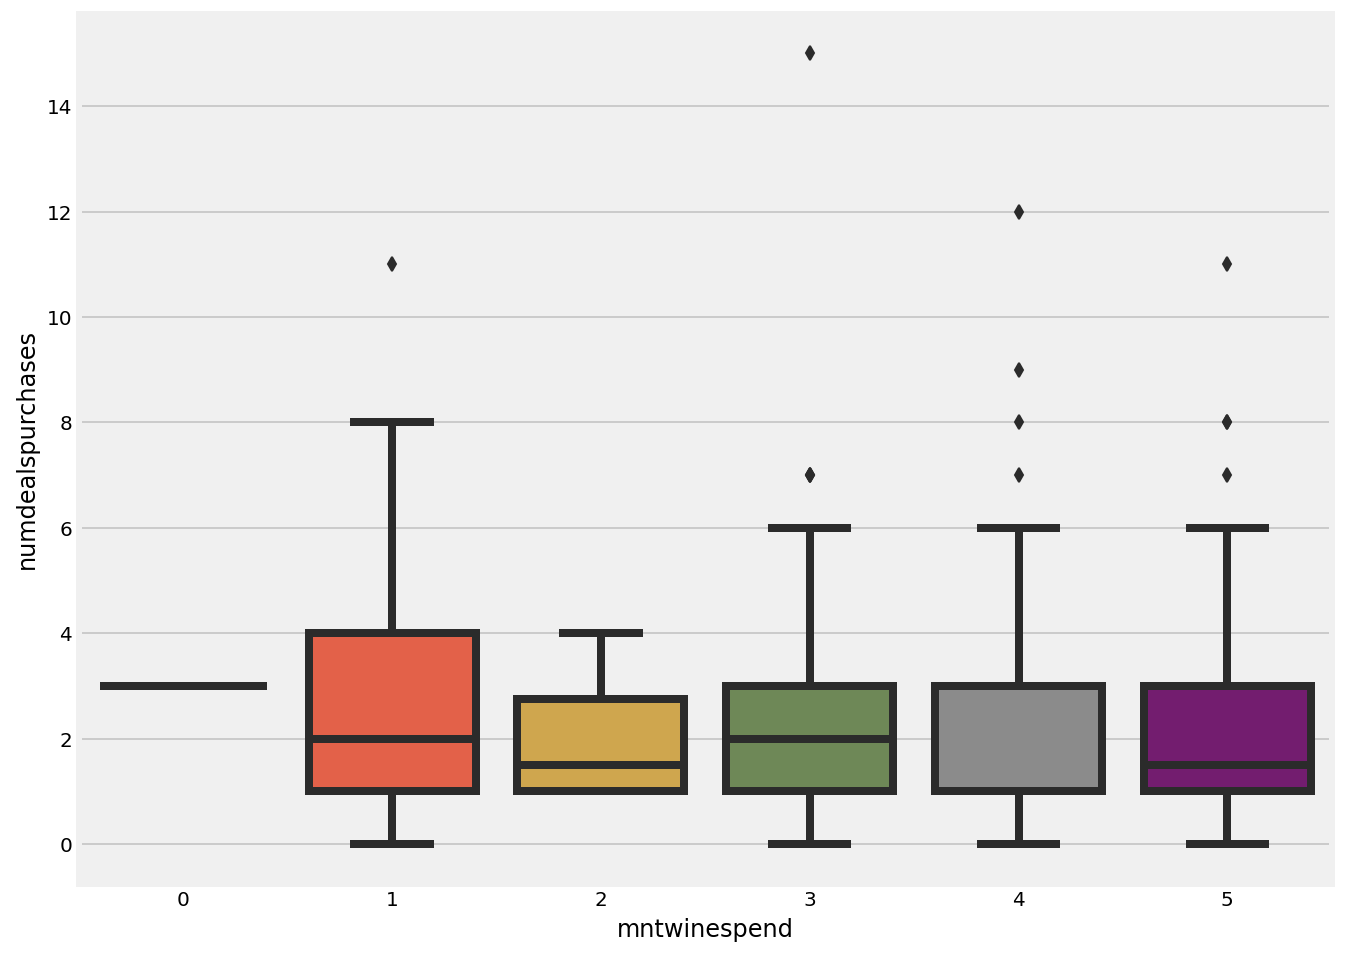

In [123]:
plt.figure(figsize=(10,8))
sns.boxplot(x='mntwinespend', y='numdealspurchases', data=responsed);
plt.savefig('responsed_mntwines&dealpurs.png')
plt.show()

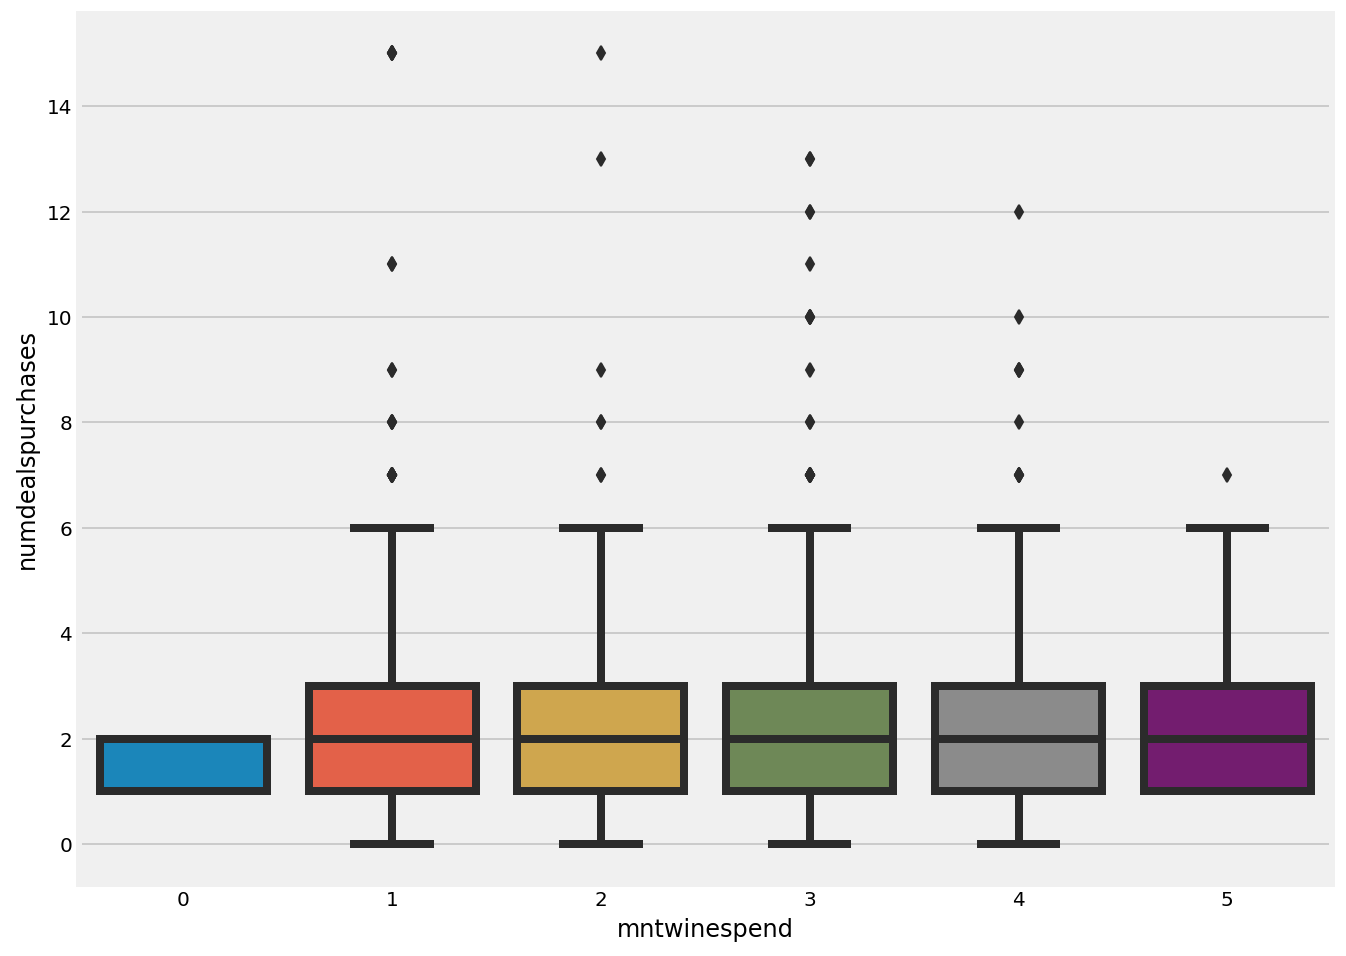

In [124]:
plt.figure(figsize=(10,8))
sns.boxplot(x='mntwinespend', y='numdealspurchases', data=noresponse);
plt.savefig('noresponse_mntwines&dealpurs.png')
plt.show()

# Education & amount spend on wines

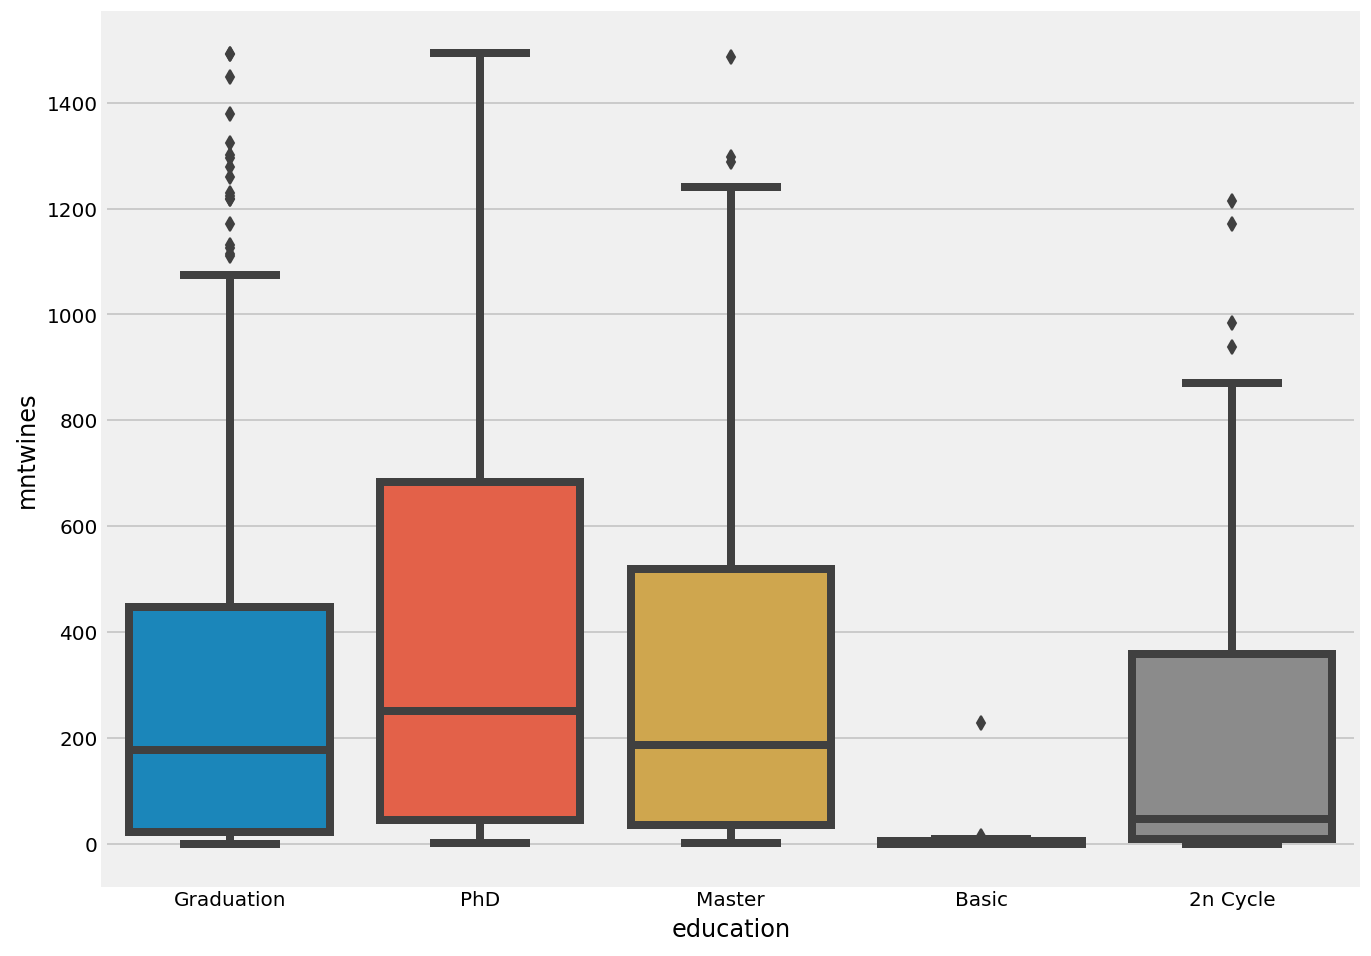

In [102]:
plt.figure(figsize=(10,8))
sns.boxplot(x='education', y='mntwines', data=noresponse);
plt.savefig('noresponse_education&mntwines.png')
plt.show()

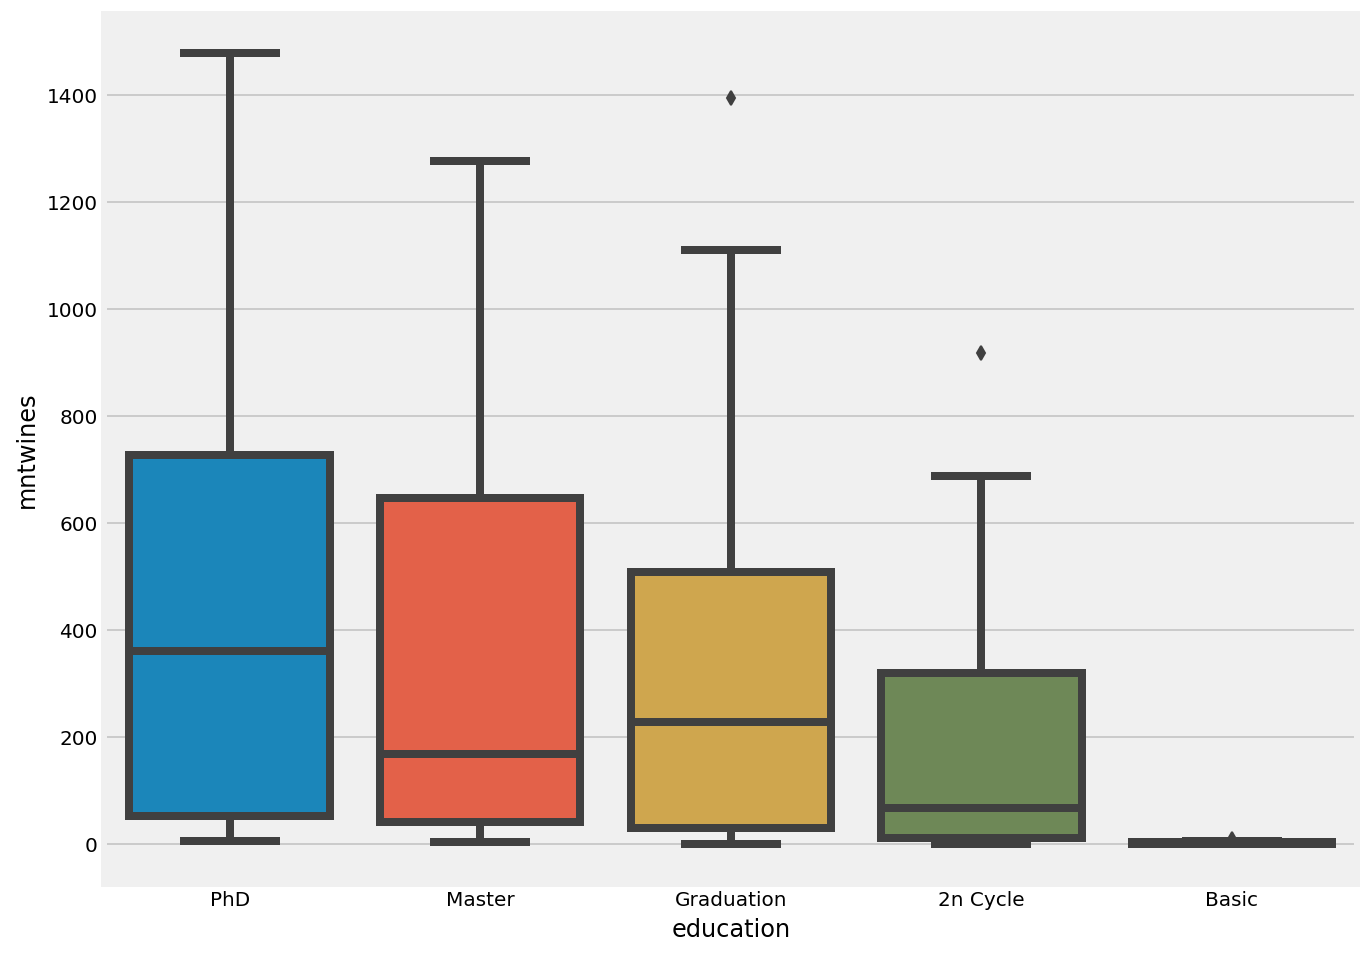

In [103]:
plt.figure(figsize=(10,8))
sns.boxplot(x='education', y='mntwines', data=responsed);
plt.savefig('responsed_education&mntwines.png')
plt.show()

# Marital status & amount spend on wines

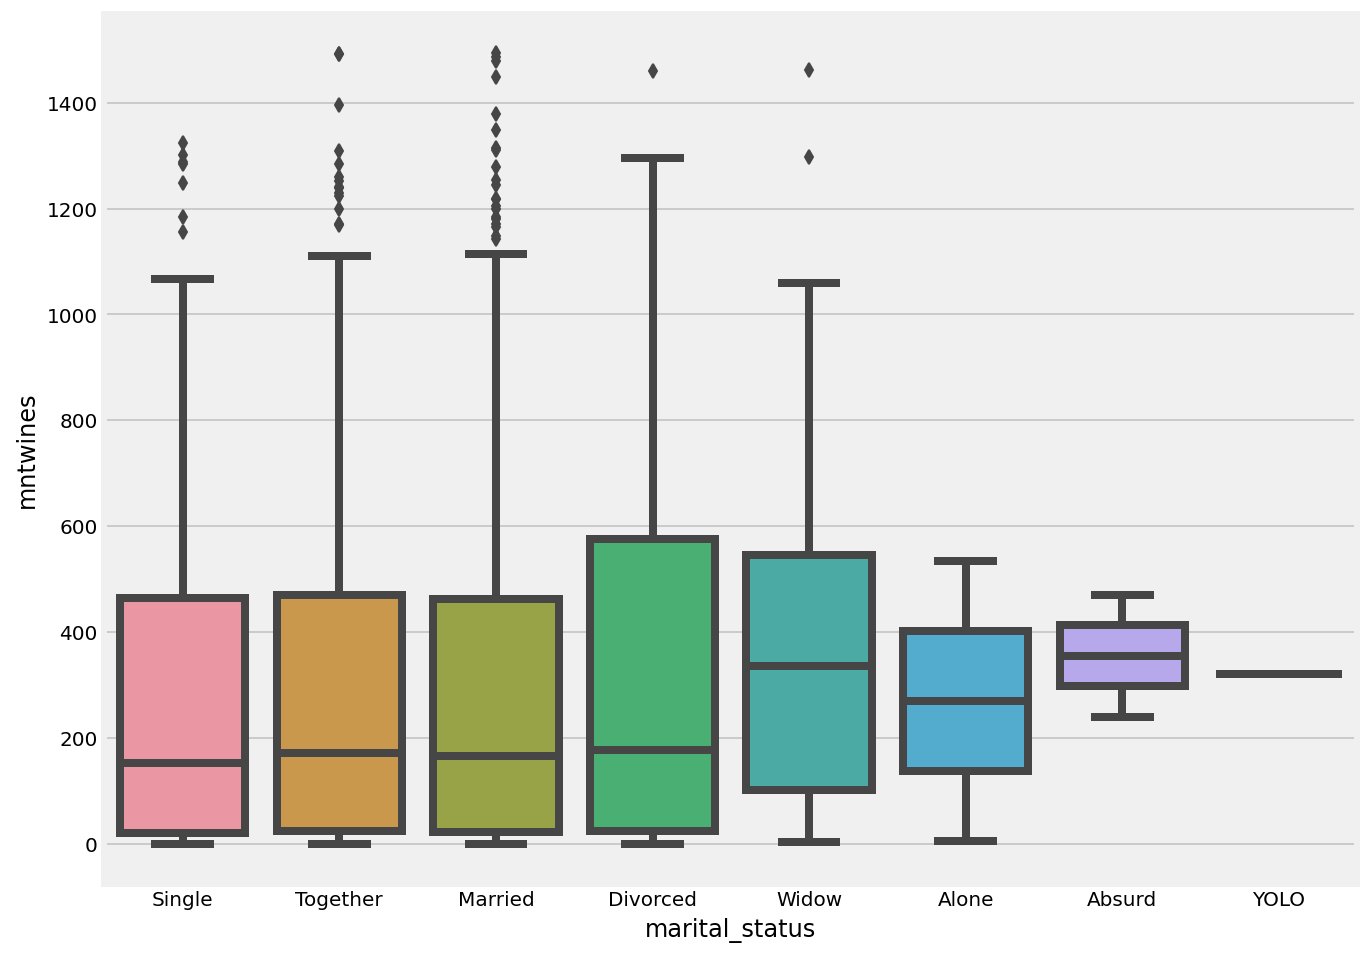

In [104]:
plt.figure(figsize=(10,8))
sns.boxplot(x='marital_status', y='mntwines', data=noresponse);
plt.savefig('noresponse_marital_status&mntwines.png')
plt.show()

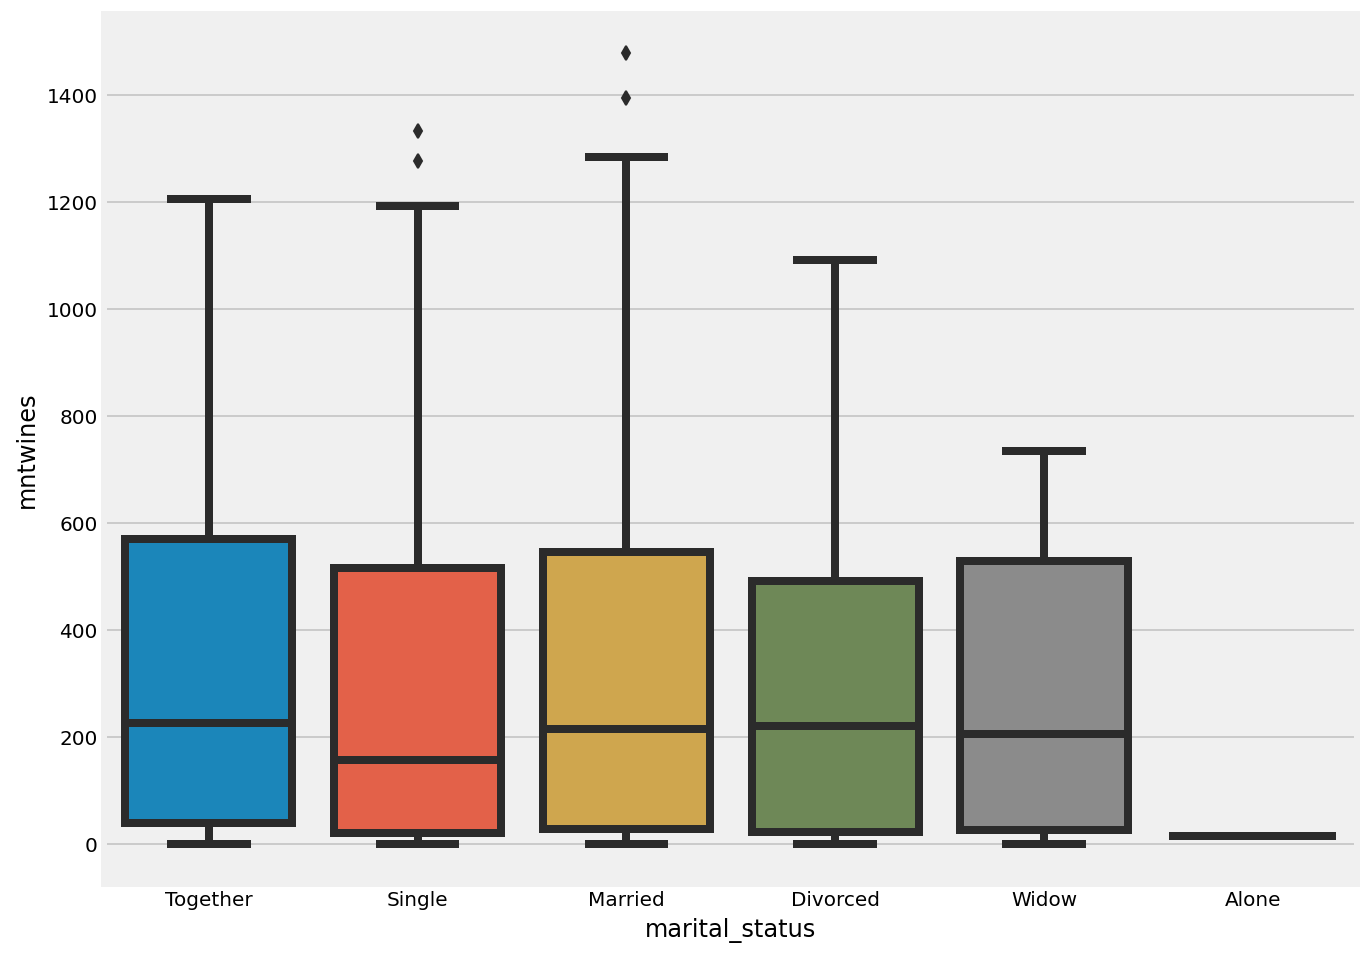

In [105]:
plt.figure(figsize=(10,8))
sns.boxplot(x='marital_status', y='mntwines', data=responsed);
plt.savefig('responsed_marital_status&mntwines.png')
plt.show()

# Number of kids & amount spend on wines

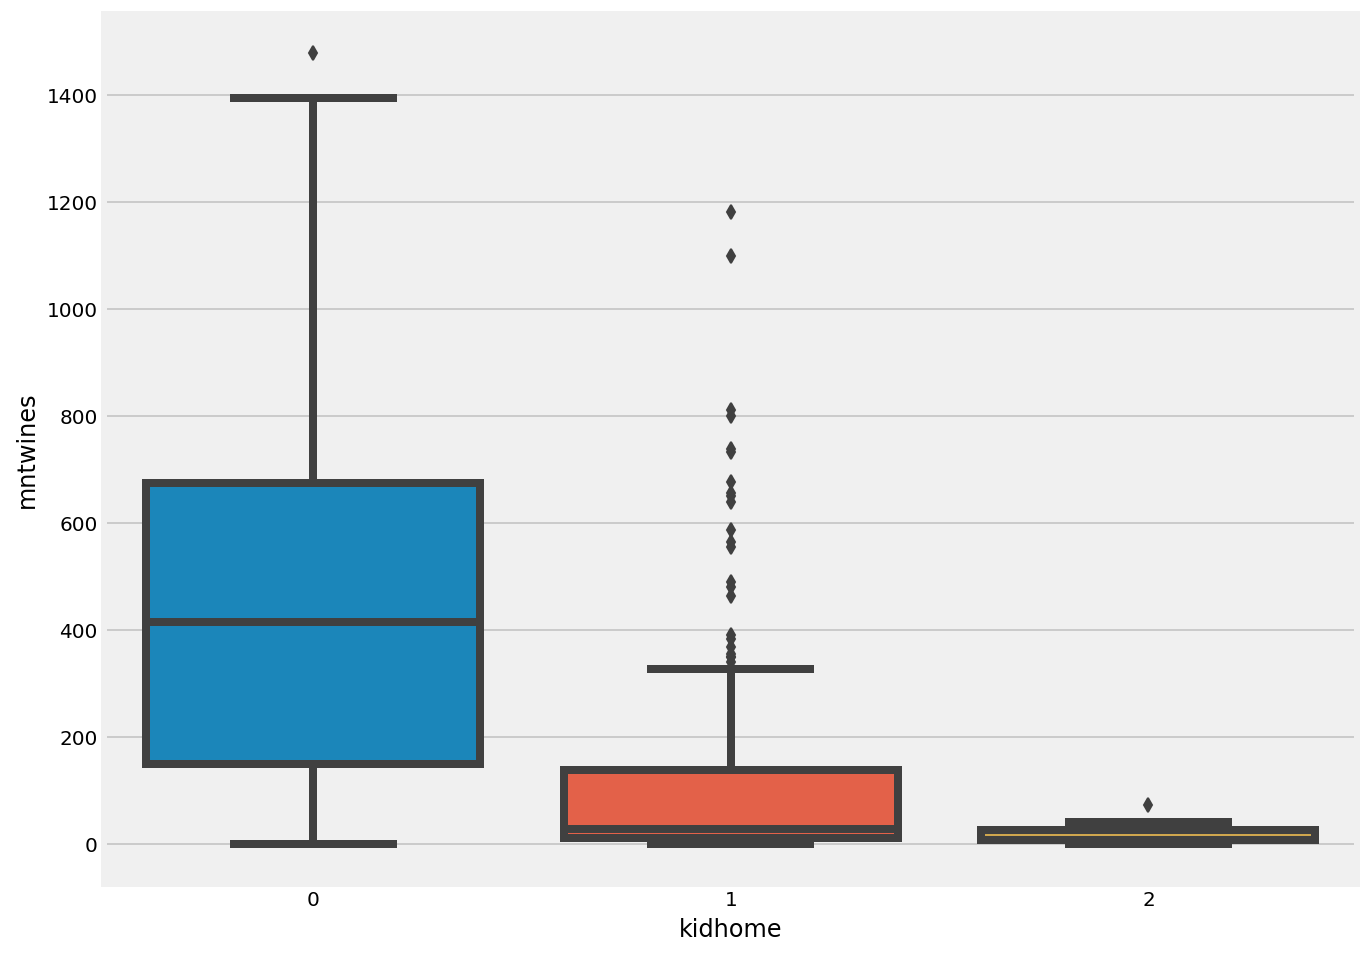

In [106]:
plt.figure(figsize=(10,8))
sns.boxplot(x='kidhome', y='mntwines', data=responsed);
plt.savefig('responsed_kidhome&mntwines.png')
plt.show()

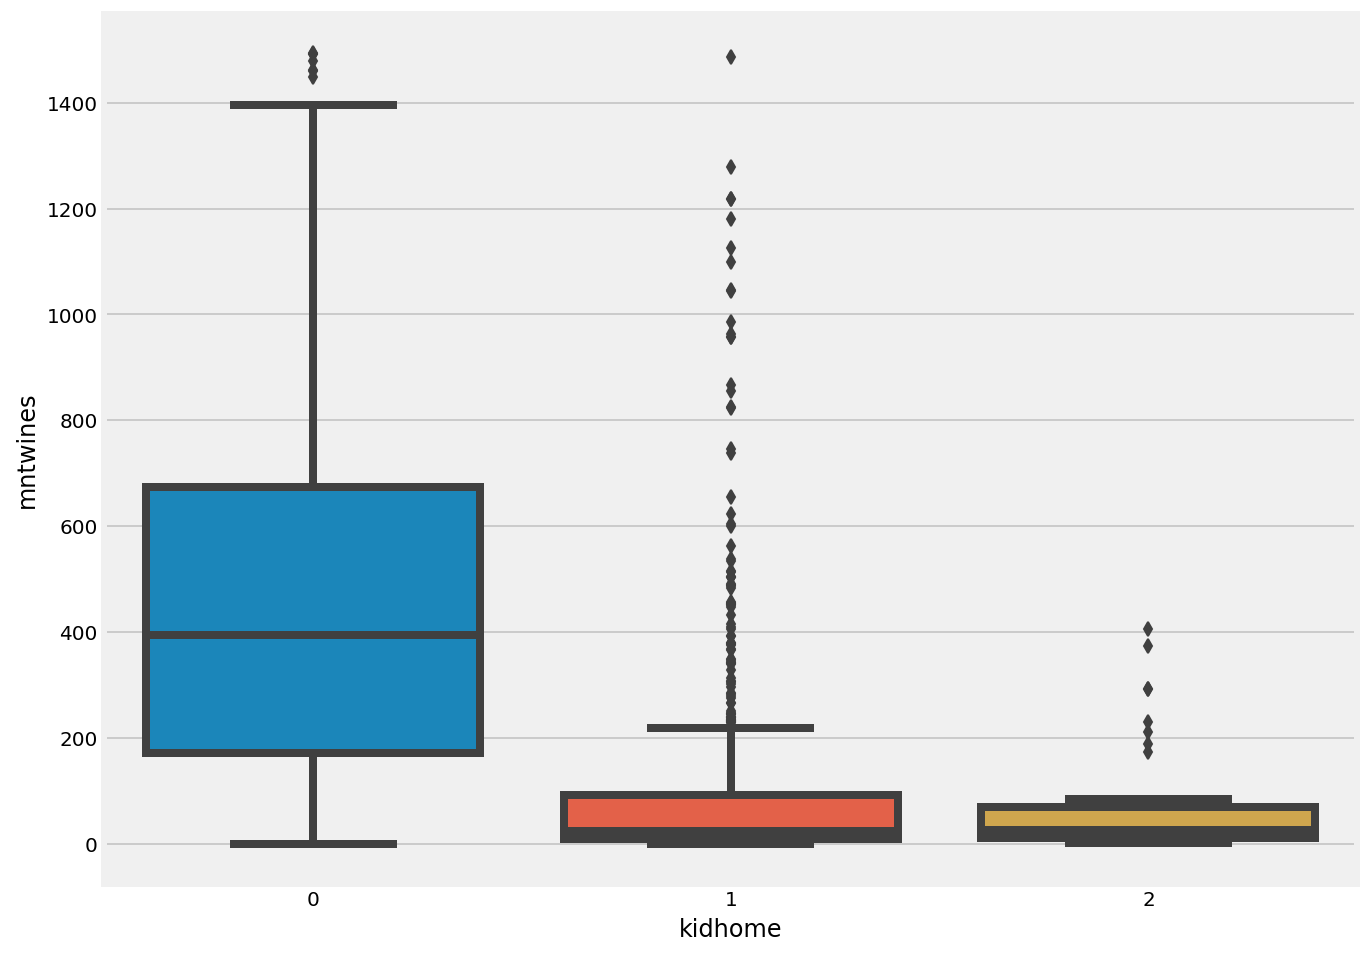

In [107]:
plt.figure(figsize=(10,8))
sns.boxplot(x='kidhome', y='mntwines', data=noresponse);
plt.savefig('noresponse_kidhome&mntwines.png')
plt.show()

# Purchases of meat products & amount spend on wines

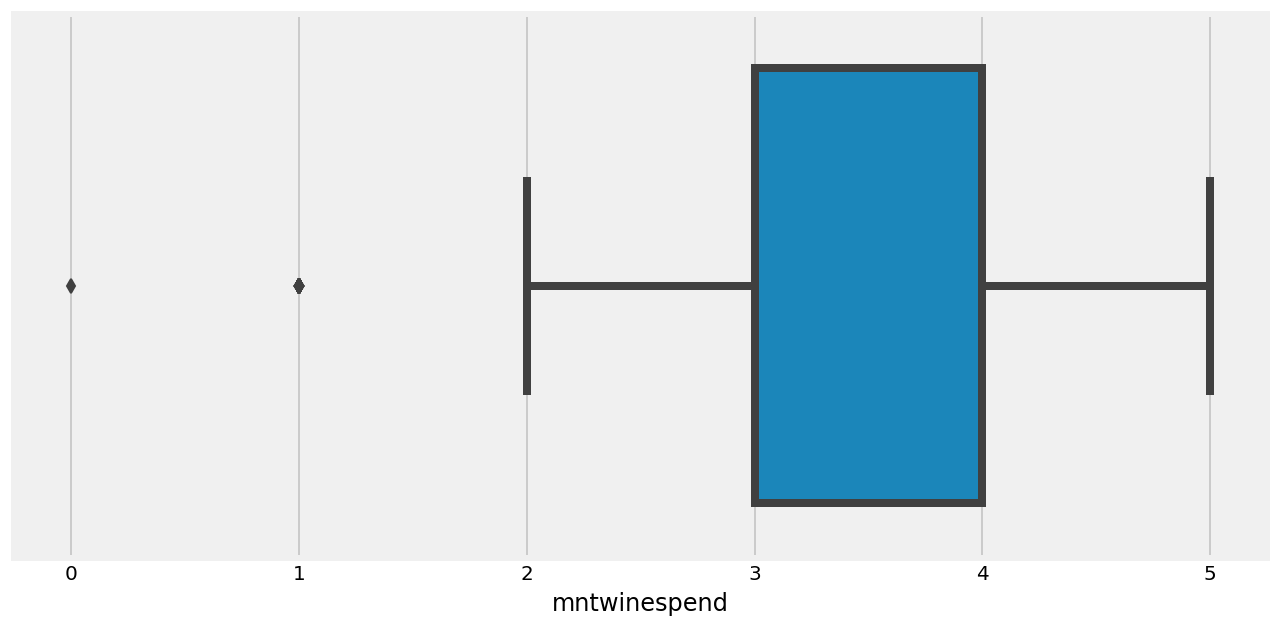

In [126]:
plt.figure(figsize=(10,5))
sns.boxplot( x='mntwinespend', data=responsed,hue='mntmeatproducts')
plt.savefig('responsed_Meatpurs&mntwinespend.png')
plt.show()

<Figure size 720x576 with 0 Axes>

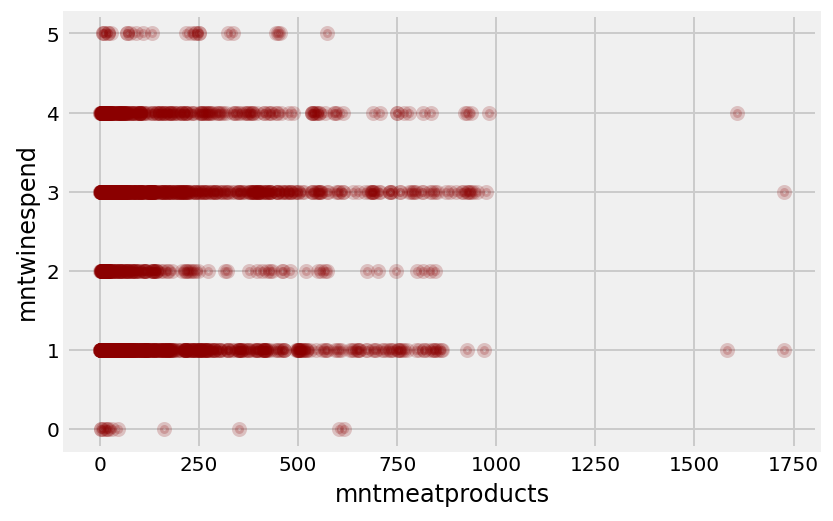

In [129]:
plt.figure(figsize=(10,8))
noresponse.plot.scatter('mntmeatproducts', 'mntwinespend', linewidths = 3, alpha=0.2, c = 'darkred')
plt.savefig('noresponse_meat&wine.png')
plt.show()

<Figure size 720x576 with 0 Axes>

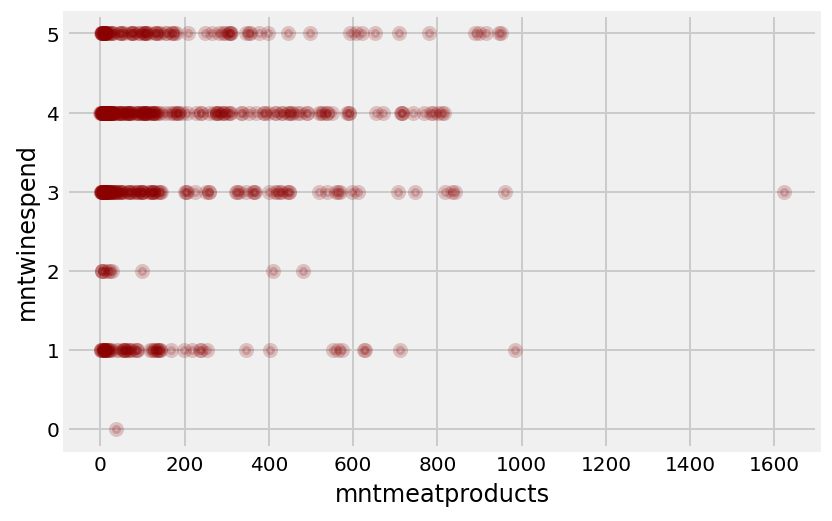

In [128]:
plt.figure(figsize=(10,8))
responsed.plot.scatter('mntmeatproducts', 'mntwinespend', linewidths = 3, alpha=0.2, c = 'darkred')
plt.savefig('responsed_meat&wine.png')
plt.show()

# Purchases of fish products & amount spend on wine

<Figure size 720x576 with 0 Axes>

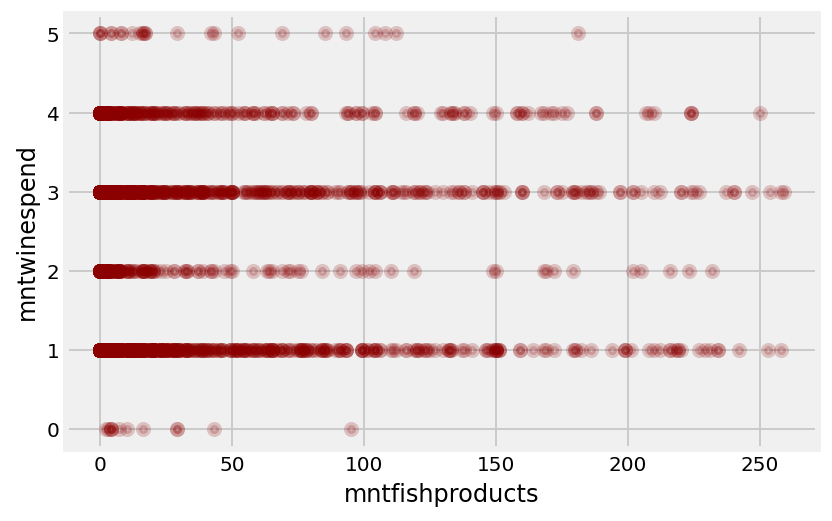

In [130]:
plt.figure(figsize=(10,8))
noresponse.plot.scatter('mntfishproducts', 'mntwinespend', linewidths = 3, alpha=0.2, c = 'darkred')
plt.savefig('noresponse_fish&wine.png')
plt.show()

<Figure size 720x576 with 0 Axes>

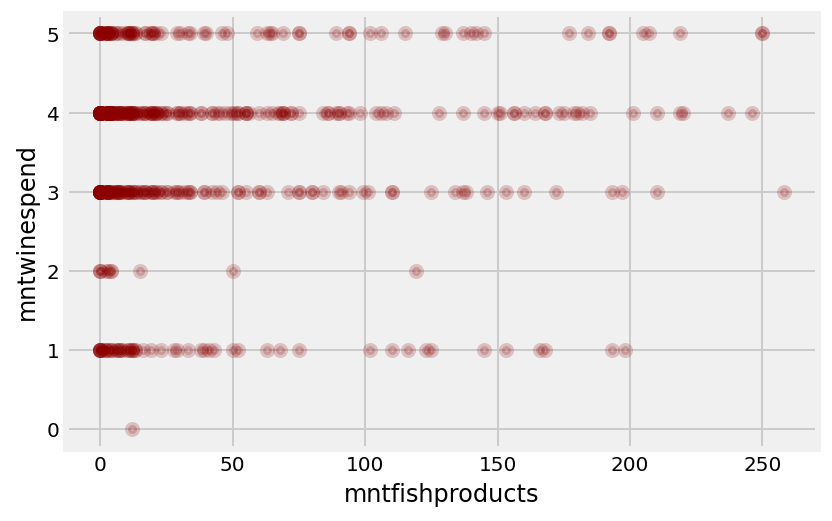

In [131]:
plt.figure(figsize=(10,8))
responsed.plot.scatter('mntfishproducts', 'mntwinespend', linewidths = 3, alpha=0.2, c = 'darkred')
plt.savefig('responsed_fish&wine.png')
plt.show()

# Income & amount spend on wines

<Figure size 720x576 with 0 Axes>

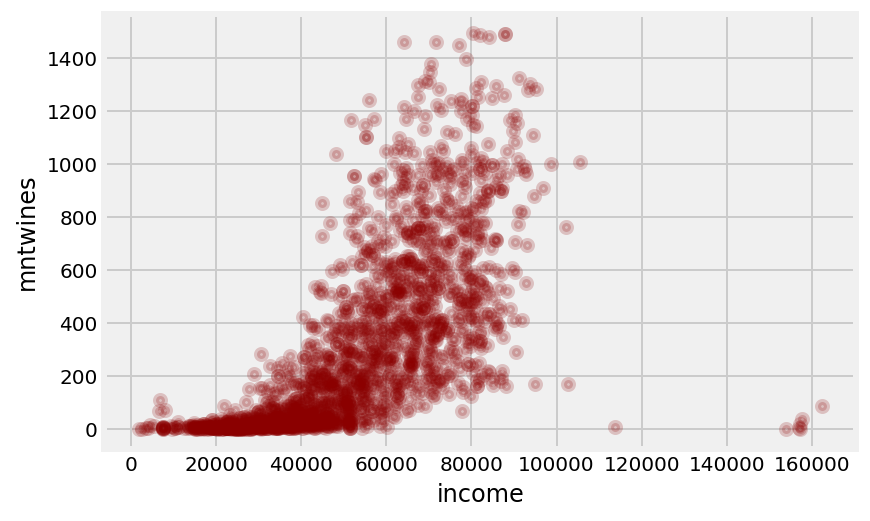

In [108]:
plt.figure(figsize=(10,8))
noresponse.plot.scatter('income', 'mntwines', linewidths = 3, alpha=0.2, c = 'darkred')
plt.savefig('noresponse_income&wine.png')
plt.show()

<Figure size 720x576 with 0 Axes>

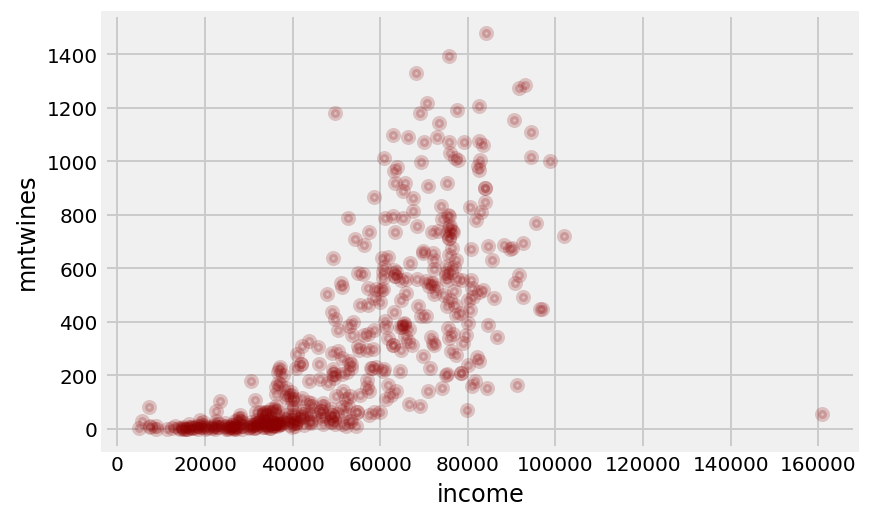

In [109]:
plt.figure(figsize=(10,8))
responsed.plot.scatter('income', 'mntwines', linewidths = 3, alpha=0.2, c = 'darkred')
plt.savefig('responsed_income&wine.png')
plt.show()

# Final touch to the dataset before modelling

We'll convert education value into numeric

In [110]:
cpnew = cp

In [111]:
cpnew.education.value_counts()

Graduation    1125
PhD            483
Master         369
2n Cycle       201
Basic           54
Name: education, dtype: int64

In [112]:
#Education map
education_map = {'Graduation': 1
                 , 'PhD': 2
                 , 'Master': 3
                 , 'Basic': 4
                 , '2n Cycle': 5
                }

cpnew['education'] = cpnew['education'].map(education_map)

In [113]:
cpnew.education.value_counts()

1    1125
2     483
3     369
5     201
4      54
Name: education, dtype: int64

We'll also convert marital status value into numeric

In [114]:
cpnew.marital_status.value_counts()

Married     863
Together    576
Single      479
Divorced    230
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: marital_status, dtype: int64

In [115]:
#Marital status map
marital_status_map = {'Single': 1
                      , 'Together': 2
                      , 'Married': 3
                      , 'Divorced': 4
                      , 'Widow': 5
                      , 'Alone': 6
                      , 'Absurd': 7
                      , 'YOLO': 8}

cpnew['marital_status'] = cpnew['marital_status'].map(marital_status_map)

cpnew.marital_status.value_counts()

3    863
2    576
1    479
4    230
5     77
6      3
8      2
7      2
Name: marital_status, dtype: int64

In [116]:
cpnew.columns

Index(['education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'complain', 'response', 'age', 'cmpresponse', 'mntwinespend'],
      dtype='object')

In [117]:
cpnew = cpnew.drop(labels = ['acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2'], axis=1)

In [118]:
cpnew.shape

(2232, 22)

In [119]:
cpnew.describe().T

,count,mean,std,min,25%,50%,75%,max
education,2232.0,1.979839,1.255752,1.0,1.00,1.0,3.00,5.0
marital_status,2232.0,2.496864,1.074120,1.0,2.00,3.0,3.00,8.0
income,2232.0,51936.799283,21425.724678,1730.0,35434.75,51381.5,68275.75,162397.0
kidhome,2232.0,0.443548,0.537641,0.0,0.00,0.0,1.00,2.0
teenhome,2232.0,0.506272,0.544691,0.0,0.00,0.0,1.00,2.0
recency,2232.0,49.116935,28.955572,0.0,24.00,49.0,74.00,99.0
mntwines,2232.0,303.854391,336.601245,0.0,24.00,173.5,504.25,1493.0
mntfruits,2232.0,26.286738,39.749916,0.0,1.00,8.0,33.00,199.0
mntmeatproducts,2232.0,167.048835,225.857428,0.0,16.00,67.0,232.00,1725.0
mntfishproducts,2232.0,37.552419,54.679064,0.0,3.00,12.0,50.00,259.0


# Updating dataset to our new sets

In [120]:
noresponse = cpnew.loc[cpnew['cmpresponse']=='none']
noresponse.shape

(1772, 22)

In [121]:
responsed = cpnew.loc[cpnew['cmpresponse']!='none']
responsed.shape

(460, 22)

# First we want to have an overview of responsed set

In [122]:
responsed.columns

Index(['education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'complain', 'response', 'age',
       'cmpresponse', 'mntwinespend'],
      dtype='object')

In [151]:
responsed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 9 to 2232
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   education            460 non-null    int64  
 1   marital_status       460 non-null    int64  
 2   income               460 non-null    float64
 3   kidhome              460 non-null    int64  
 4   teenhome             460 non-null    int64  
 5   recency              460 non-null    int64  
 6   mntwines             460 non-null    int64  
 7   mntfruits            460 non-null    int64  
 8   mntmeatproducts      460 non-null    int64  
 9   mntfishproducts      460 non-null    int64  
 10  mntsweetproducts     460 non-null    int64  
 11  mntgoldprods         460 non-null    int64  
 12  numdealspurchases    460 non-null    int64  
 13  numwebpurchases      460 non-null    int64  
 14  numcatalogpurchases  460 non-null    int64  
 15  numstorepurchases    460 non-null    in

# We'll use Feature section algorithm to help identify the best matching features

In [242]:
responsed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 9 to 2232
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   education            460 non-null    int64  
 1   marital_status       460 non-null    int64  
 2   income               460 non-null    float64
 3   kidhome              460 non-null    int64  
 4   teenhome             460 non-null    int64  
 5   recency              460 non-null    int64  
 6   mntwines             460 non-null    int64  
 7   mntfruits            460 non-null    int64  
 8   mntmeatproducts      460 non-null    int64  
 9   mntfishproducts      460 non-null    int64  
 10  mntsweetproducts     460 non-null    int64  
 11  mntgoldprods         460 non-null    int64  
 12  numdealspurchases    460 non-null    int64  
 13  numwebpurchases      460 non-null    int64  
 14  numcatalogpurchases  460 non-null    int64  
 15  numstorepurchases    460 non-null    in

In [243]:
responsed["cmpresponse"] = responsed["cmpresponse"].replace(to_replace ="cmp1", value =0) 
responsed["cmpresponse"] = responsed["cmpresponse"].replace(to_replace ="cmp2", value =1)
responsed["cmpresponse"] = responsed["cmpresponse"].replace(to_replace ="cmp3", value =2)
responsed["cmpresponse"] = responsed["cmpresponse"].replace(to_replace ="cmp4", value =3)
responsed["cmpresponse"] = responsed["cmpresponse"].replace(to_replace ="cmp5", value =4)
responsed["cmpresponse"] = responsed["cmpresponse"].replace(to_replace ="multiple", value =5)

In [244]:
responsed["cmpresponse"].unique()

array([2, 5, 0, 3, 4, 1])

In [245]:
responsed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 9 to 2232
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   education            460 non-null    int64  
 1   marital_status       460 non-null    int64  
 2   income               460 non-null    float64
 3   kidhome              460 non-null    int64  
 4   teenhome             460 non-null    int64  
 5   recency              460 non-null    int64  
 6   mntwines             460 non-null    int64  
 7   mntfruits            460 non-null    int64  
 8   mntmeatproducts      460 non-null    int64  
 9   mntfishproducts      460 non-null    int64  
 10  mntsweetproducts     460 non-null    int64  
 11  mntgoldprods         460 non-null    int64  
 12  numdealspurchases    460 non-null    int64  
 13  numwebpurchases      460 non-null    int64  
 14  numcatalogpurchases  460 non-null    int64  
 15  numstorepurchases    460 non-null    in

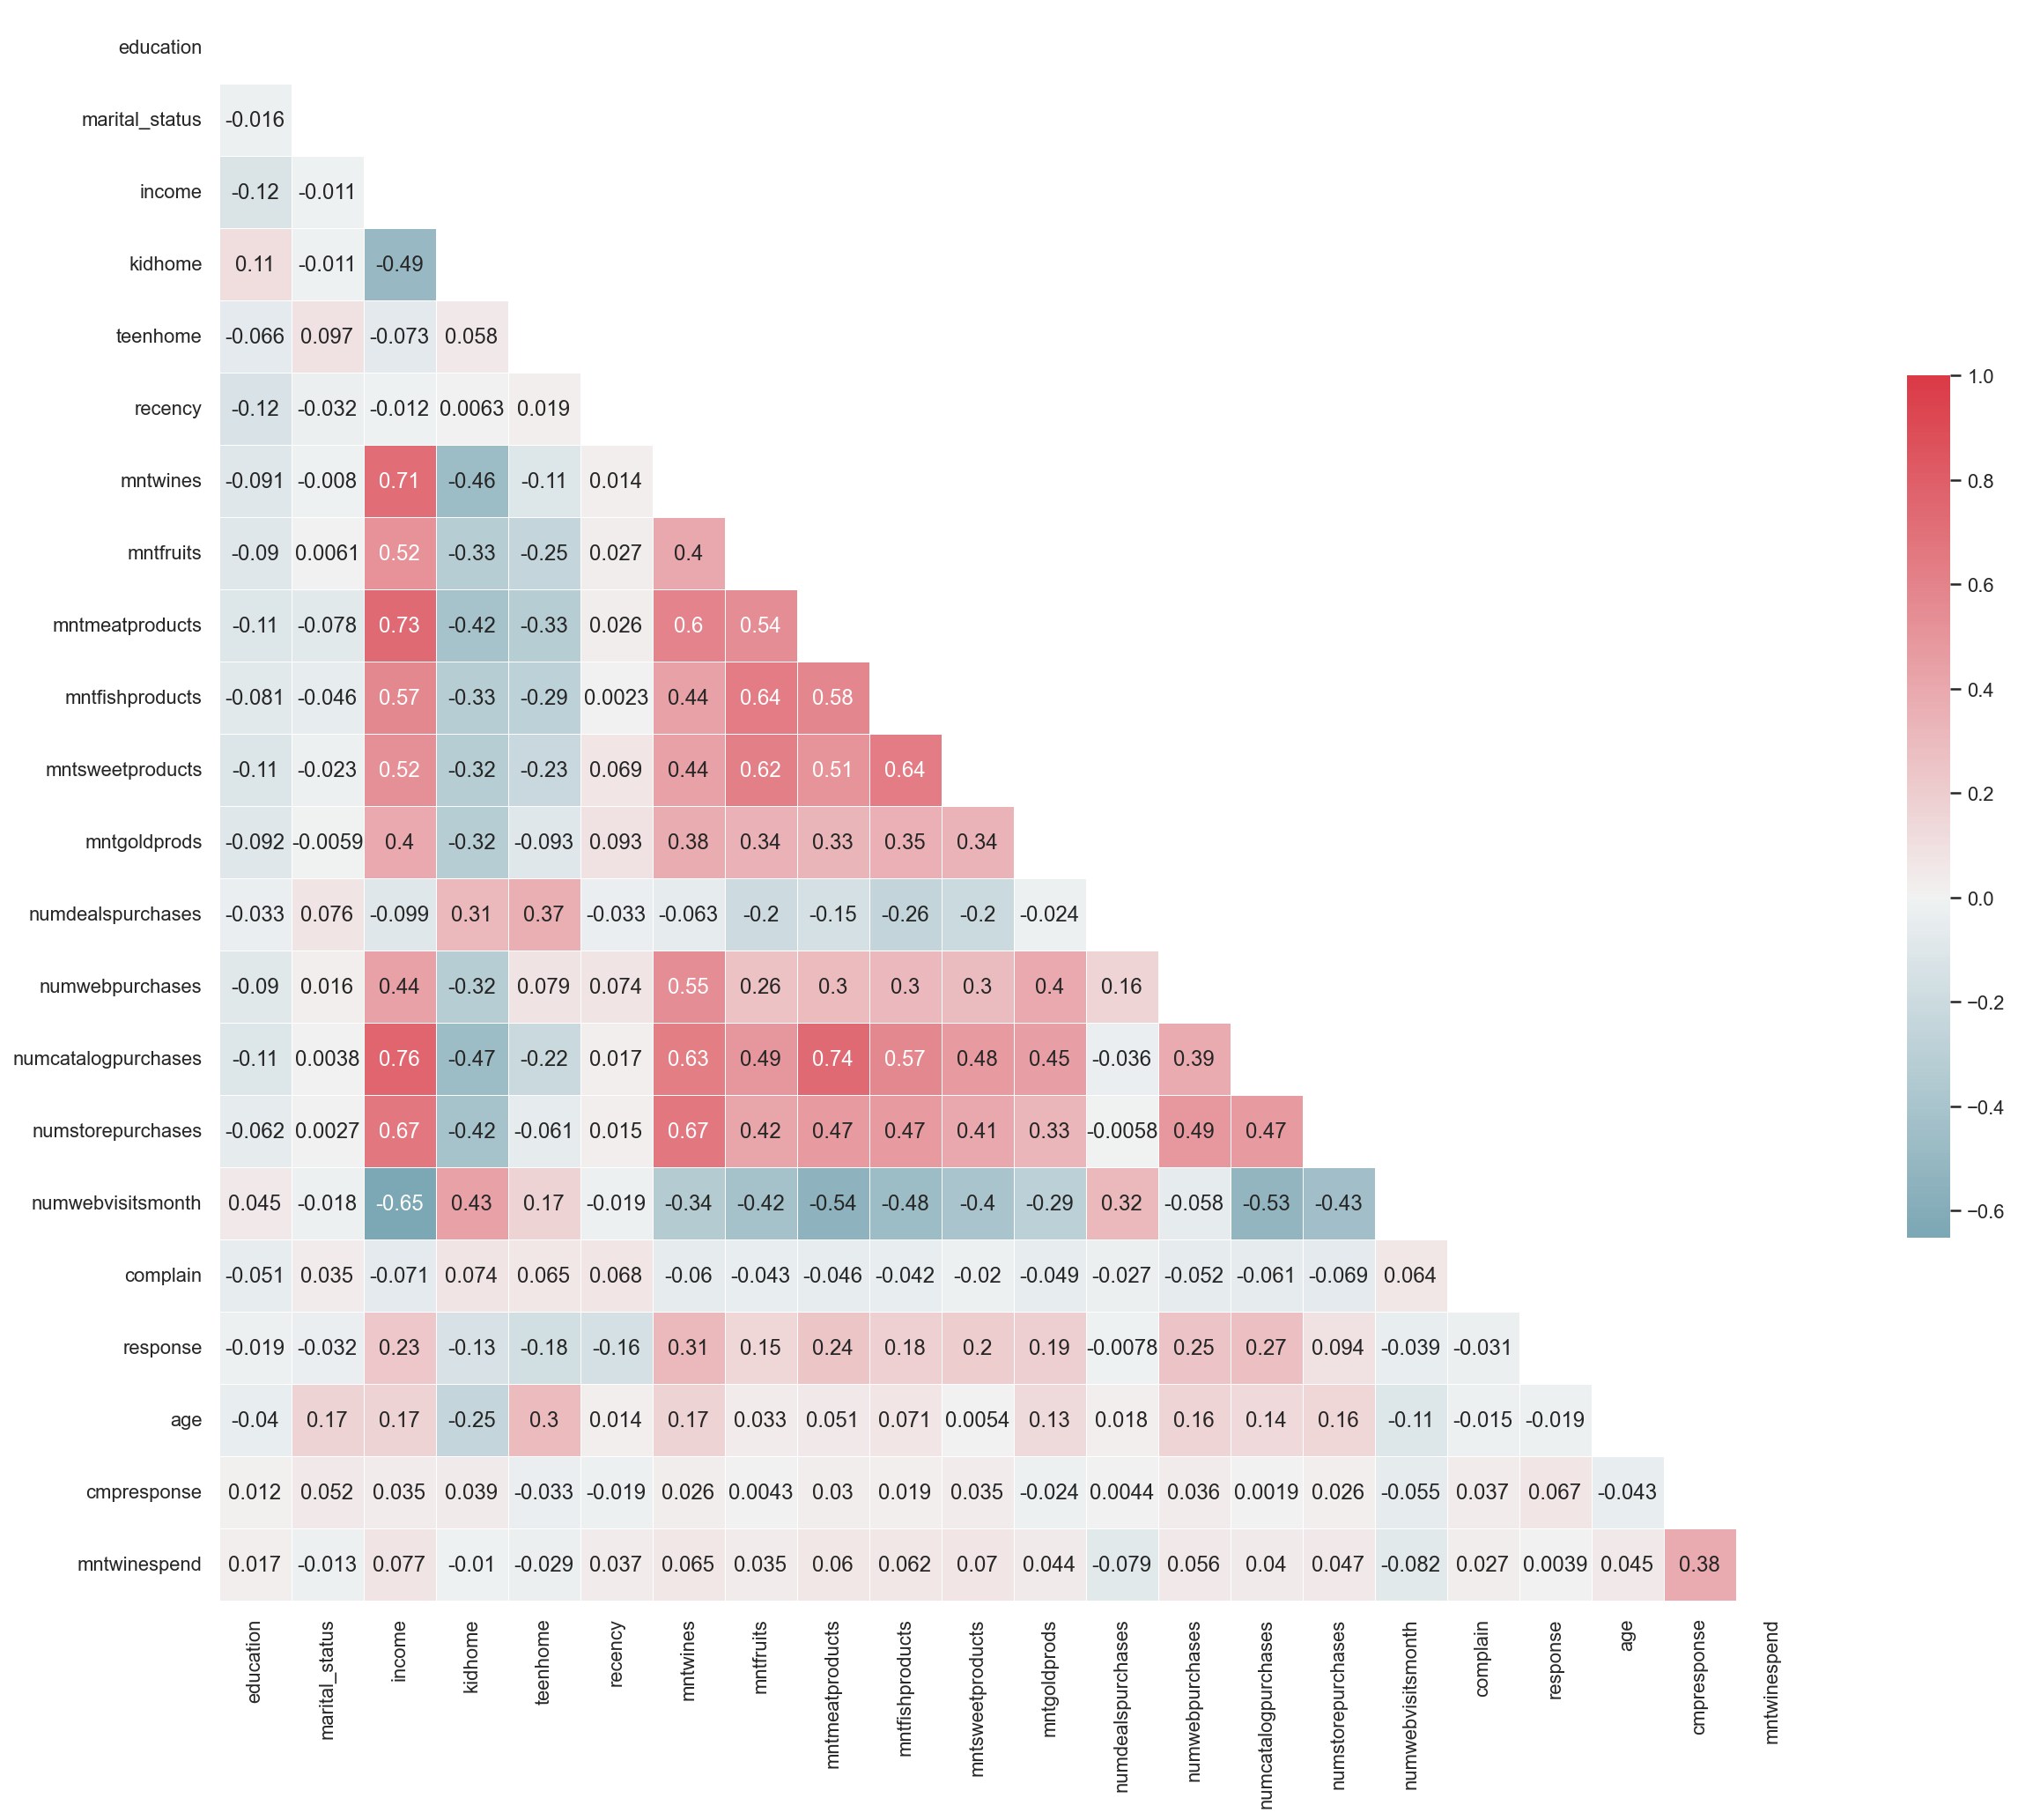

In [246]:
sns.set(style="white")

mask = np.zeros_like(responsed.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 18))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(responsed.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

# Set Target

In [258]:
target_column = 'cmpresponse'
feature_columns = [c for c in responsed.columns if c != target_column]

In [261]:
X = responsed[feature_columns]
y = responsed[target_column]

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) 

In [248]:
feature_columns

['education',
 'marital_status',
 'income',
 'kidhome',
 'teenhome',
 'recency',
 'mntwines',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods',
 'numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases',
 'numwebvisitsmonth',
 'complain',
 'response',
 'age',
 'mntwinespend']

In [249]:
y = responsed[target_column]
X = responsed[feature_columns]

In [250]:
X

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,mntwinespend
9,2,2,5648.0,1,1,68,28,0,6,1,...,13,1,1,0,0,20,0,0,72,1
15,2,1,82800.0,0,0,23,1006,22,115,59,...,45,1,7,6,12,3,0,1,76,5
18,3,3,76995.0,0,1,91,1012,80,498,0,...,176,2,11,4,9,5,0,0,73,5
22,2,3,58607.0,0,1,63,867,0,86,0,...,19,3,2,3,9,8,0,0,73,4
29,2,3,84618.0,0,0,96,684,100,801,21,...,0,1,6,9,10,2,0,0,57,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,1,2,22775.0,1,0,40,5,1,8,0,...,1,1,1,0,2,8,0,0,44,4
2221,3,1,75777.0,0,0,12,712,26,538,69,...,80,1,3,6,11,1,0,1,40,4
2225,1,2,58554.0,1,1,55,368,24,68,38,...,88,6,8,2,6,7,0,0,54,1
2227,1,1,57967.0,0,1,39,229,7,137,4,...,91,5,4,2,8,5,0,0,60,1


In [251]:
y

9       2
15      5
18      0
22      3
29      4
       ..
2218    5
2221    2
2225    3
2227    2
2232    0
Name: cmpresponse, Length: 460, dtype: int64

# Select best 5 features

In [264]:
kbest = SelectKBest(score_func=chi2, k=5)

In [266]:
fit = kbest.fit(X, y)

In [267]:
pd.DataFrame(fit.scores_, index=feature_columns)

,0
education,5.427411
marital_status,0.908115
income,60055.290600
kidhome,3.771145
teenhome,2.801367
recency,65.912388
mntwines,1099.701278
mntfruits,169.386277
mntmeatproducts,673.271568
mntfishproducts,474.433821


In [268]:
features = fit.transform(X)

In [269]:
pd.DataFrame(features) 

,0,1,2,3,4
0,5648.0,28.0,6.0,1.0,13.0
1,82800.0,1006.0,115.0,59.0,45.0
2,76995.0,1012.0,498.0,0.0,176.0
3,58607.0,867.0,86.0,0.0,19.0
4,84618.0,684.0,801.0,21.0,0.0
...,...,...,...,...,...
455,22775.0,5.0,8.0,0.0,1.0
456,75777.0,712.0,538.0,69.0,80.0
457,58554.0,368.0,68.0,38.0,88.0
458,57967.0,229.0,137.0,4.0,91.0


In [270]:
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
fit = rfe.fit(X, y)
print("Num Features: %d", fit.n_features_) 
print("Selected Features: %s", fit.support_) 
print("Feature Ranking: %s", fit.ranking_)

Num Features: %d 5
Selected Features: %s [False False False False False  True  True False  True False False False
 False False False False False False False  True  True]
Feature Ranking: %s [13 11  7 14 15  1  1  6  1  5  4  3  9  8 10 12  2 17 16  1  1]


In [271]:
pd.DataFrame(fit.support_, index=feature_columns)

,0
education,False
marital_status,False
income,False
kidhome,False
teenhome,False
recency,True
mntwines,True
mntfruits,False
mntmeatproducts,True
mntfishproducts,False


# Top 5 feature from responsed dataset to use are recency, mntwines, mntmeatproducts, age, mntwinespend

# Now we're going to use these five features to predict which customer are more likely to accept our next campaign

In [272]:
noresponse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 0 to 2235
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   education            1772 non-null   int64  
 1   marital_status       1772 non-null   int64  
 2   income               1772 non-null   float64
 3   kidhome              1772 non-null   int64  
 4   teenhome             1772 non-null   int64  
 5   recency              1772 non-null   int64  
 6   mntwines             1772 non-null   int64  
 7   mntfruits            1772 non-null   int64  
 8   mntmeatproducts      1772 non-null   int64  
 9   mntfishproducts      1772 non-null   int64  
 10  mntsweetproducts     1772 non-null   int64  
 11  mntgoldprods         1772 non-null   int64  
 12  numdealspurchases    1772 non-null   int64  
 13  numwebpurchases      1772 non-null   int64  
 14  numcatalogpurchases  1772 non-null   int64  
 15  numstorepurchases    1772 non-null   i

In [273]:
noresponse['cmpresponse'].value_counts()

none    1772
Name: cmpresponse, dtype: int64

In [275]:
noresponse['response'].value_counts(normalize=True)

0    0.858352
1    0.141648
Name: response, dtype: float64

In [277]:
responsed['response'].value_counts(normalize=True)

0    0.821739
1    0.178261
Name: response, dtype: float64

In [276]:
noresponse['complain'].value_counts(normalize=True)

0    0.989842
1    0.010158
Name: complain, dtype: float64

In [279]:
responsed['complain'].value_counts(normalize=True)

0    0.995652
1    0.004348
Name: complain, dtype: float64

# Modelling
we'll use the whole dataset to train, validate and teat our models

In [280]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2235
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   education            2232 non-null   int64  
 1   marital_status       2232 non-null   int64  
 2   income               2232 non-null   float64
 3   kidhome              2232 non-null   int64  
 4   teenhome             2232 non-null   int64  
 5   recency              2232 non-null   int64  
 6   mntwines             2232 non-null   int64  
 7   mntfruits            2232 non-null   int64  
 8   mntmeatproducts      2232 non-null   int64  
 9   mntfishproducts      2232 non-null   int64  
 10  mntsweetproducts     2232 non-null   int64  
 11  mntgoldprods         2232 non-null   int64  
 12  numdealspurchases    2232 non-null   int64  
 13  numwebpurchases      2232 non-null   int64  
 14  numcatalogpurchases  2232 non-null   int64  
 15  numstorepurchases    2232 non-null   i

In [320]:
cp1 = cp

In [288]:

cp1["cmpresponse"] = cp1["cmpresponse"].replace(to_replace ="none", value =0) 
cp1["cmpresponse"] = cp1["cmpresponse"].replace(to_replace ="cmp1", value =1)
cp1["cmpresponse"] = cp1["cmpresponse"].replace(to_replace ="cmp2", value =2)
cp1["cmpresponse"] = cp1["cmpresponse"].replace(to_replace ="cmp3", value =3)
cp1["cmpresponse"] = cp1["cmpresponse"].replace(to_replace ="cmp4", value =4)
cp1["cmpresponse"] = cp1["cmpresponse"].replace(to_replace ="cmp5", value =5)
cp1["cmpresponse"] = cp1["cmpresponse"].replace(to_replace ="multiple", value =6)

In [289]:
cp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2235
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   education            2232 non-null   int64  
 1   marital_status       2232 non-null   int64  
 2   income               2232 non-null   float64
 3   kidhome              2232 non-null   int64  
 4   teenhome             2232 non-null   int64  
 5   recency              2232 non-null   int64  
 6   mntwines             2232 non-null   int64  
 7   mntfruits            2232 non-null   int64  
 8   mntmeatproducts      2232 non-null   int64  
 9   mntfishproducts      2232 non-null   int64  
 10  mntsweetproducts     2232 non-null   int64  
 11  mntgoldprods         2232 non-null   int64  
 12  numdealspurchases    2232 non-null   int64  
 13  numwebpurchases      2232 non-null   int64  
 14  numcatalogpurchases  2232 non-null   int64  
 15  numstorepurchases    2232 non-null   i

In [321]:
cp1.shape

(2232, 27)

In [322]:
cp1['cmpresponse'].value_counts(normalize=True)

0    0.817204
5    0.061380
2    0.057796
3    0.037186
4    0.025986
1    0.000448
Name: cmpresponse, dtype: float64

In [323]:
cp1['response'].value_counts(normalize=True)

0    0.850806
1    0.149194
Name: response, dtype: float64

In [324]:
cp1['response'].value_counts()

0    1899
1     333
Name: response, dtype: int64

We'll take 20% sample of this dataset for testing

In [325]:
cp1_unseen = cp1.sample(frac=0.2)
cp1_train = cp1.sample(frac=0.8)

In [326]:
cp1_unseen.shape

(446, 27)

In [327]:
cp1_train.shape

(1786, 27)

In [319]:
cp['response'].value_counts()

0    1899
1     333
Name: response, dtype: int64

In [331]:
cp1_train[cp1_train['response']==1].shape

(269, 27)

In [332]:
cp1_train[cp1_train['response']==0].shape

(1517, 27)

Our dataset is imbalanced so we'll apply oversampling technique

In [334]:
cp11 = cp1_train.loc[cp1_train['response']==1]
cp10 = cp1_train.loc[cp1_train['response']==0]

cp11_samp = cp11.sample(260)
cp10_samp = cp10.sample(260)

cpsam = pd.concat([cp11_samp, cp10_samp])
cpsam.shape

(520, 27)

# Using top 5 features on training data

In [303]:
cp1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2235
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   education            2232 non-null   int64  
 1   marital_status       2232 non-null   int64  
 2   income               2232 non-null   float64
 3   kidhome              2232 non-null   int64  
 4   teenhome             2232 non-null   int64  
 5   recency              2232 non-null   int64  
 6   mntwines             2232 non-null   int64  
 7   mntfruits            2232 non-null   int64  
 8   mntmeatproducts      2232 non-null   int64  
 9   mntfishproducts      2232 non-null   int64  
 10  mntsweetproducts     2232 non-null   int64  
 11  mntgoldprods         2232 non-null   int64  
 12  numdealspurchases    2232 non-null   int64  
 13  numwebpurchases      2232 non-null   int64  
 14  numcatalogpurchases  2232 non-null   int64  
 15  numstorepurchases    2232 non-null   i

# Set target

In [336]:
target = 'response'

#Top 5 features
features = ['recency', 'mntwines', 'mntmeatproducts', 'age', 'mntwinespend']


In [337]:
#Training set

X = cpsam[features]
y = cpsam[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#Unseen set

X_us = cp1_unseen[features]
y_us = cp1_unseen[target]


# Logistic Regression Model 

              precision    recall  f1-score   support

           0       0.61      0.62      0.62        48
           1       0.67      0.66      0.67        56

    accuracy                           0.64       104
   macro avg       0.64      0.64      0.64       104
weighted avg       0.64      0.64      0.64       104

accuracy_test =  0.6442307692307693


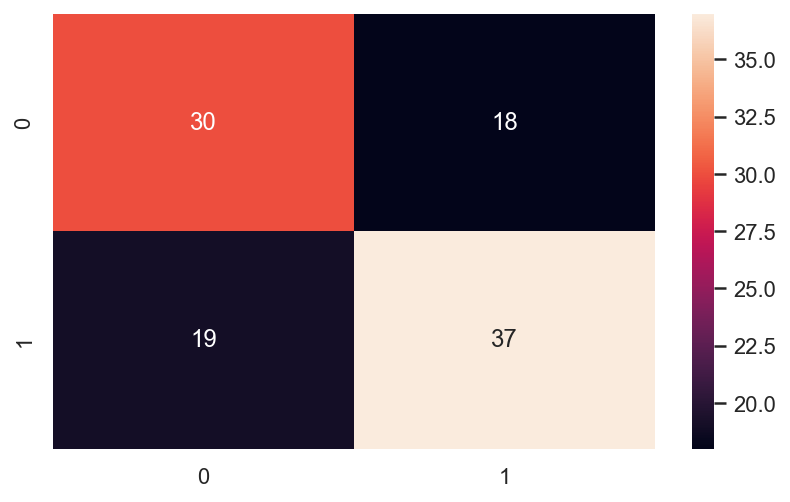

In [340]:

#Training set
lg = LogisticRegression()
lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)
y_pp = lg.predict_proba(X_test)[:, 1]
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))
print('accuracy_test = ', ac)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       372
           1       0.64      0.12      0.20        74

    accuracy                           0.84       446
   macro avg       0.75      0.55      0.56       446
weighted avg       0.82      0.84      0.80       446

accuracy_unseen =  0.8430493273542601


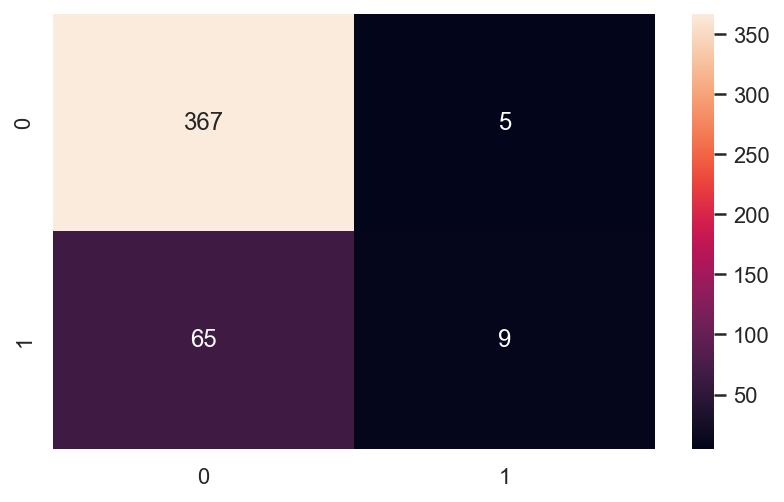

In [341]:
#Unseen set

lg.fit(X_us, y_us)
y_pred_us = lg.predict(X_us)
y_pp_us = lg.predict_proba(X_us)[:, 1]
ac_us = accuracy_score(y_us, y_pred_us)

cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');

print(classification_report(y_us, y_pred_us))
print('accuracy_unseen = ', ac_us)

# Support Vector Machine

              precision    recall  f1-score   support

           0       0.58      0.65      0.61        48
           1       0.67      0.61      0.64        56

    accuracy                           0.62       104
   macro avg       0.63      0.63      0.62       104
weighted avg       0.63      0.62      0.63       104

accuracy_test =  0.625


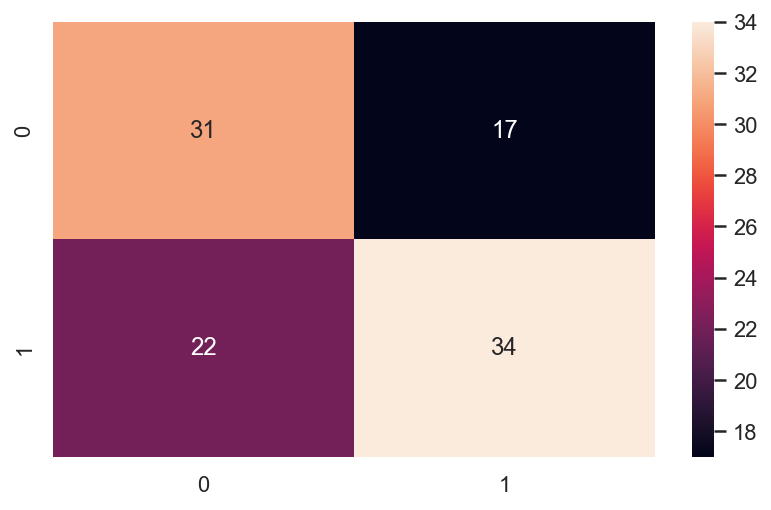

In [343]:

#Training set
svm = SVC(kernel='linear', probability=True, max_iter=1000)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_pp = svm.predict_proba(X_test)[:, 1]

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))
print('accuracy_test = ', ac)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       372
           1       0.31      0.42      0.36        74

    accuracy                           0.75       446
   macro avg       0.59      0.62      0.60       446
weighted avg       0.78      0.75      0.76       446

accuracy_unseen =  0.7511210762331838


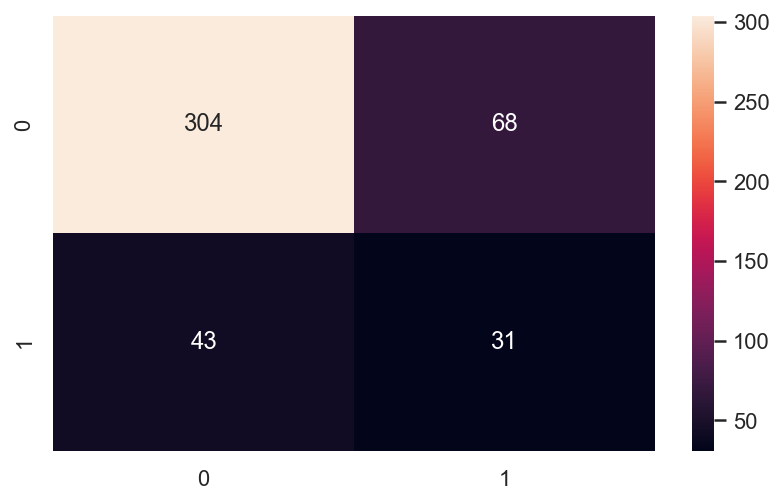

In [344]:
#Unseen set

svm.fit(X_us, y_us)

y_pred_us = svm.predict(X_us)
y_pp_us = svm.predict_proba(X_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');

print(classification_report(y_us, y_pred_us))
print('accuracy_unseen = ', ac_us)

# Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.54      0.77      0.63        48
           1       0.69      0.43      0.53        56

    accuracy                           0.59       104
   macro avg       0.61      0.60      0.58       104
weighted avg       0.62      0.59      0.58       104

accuracy_score =  0.5865384615384616


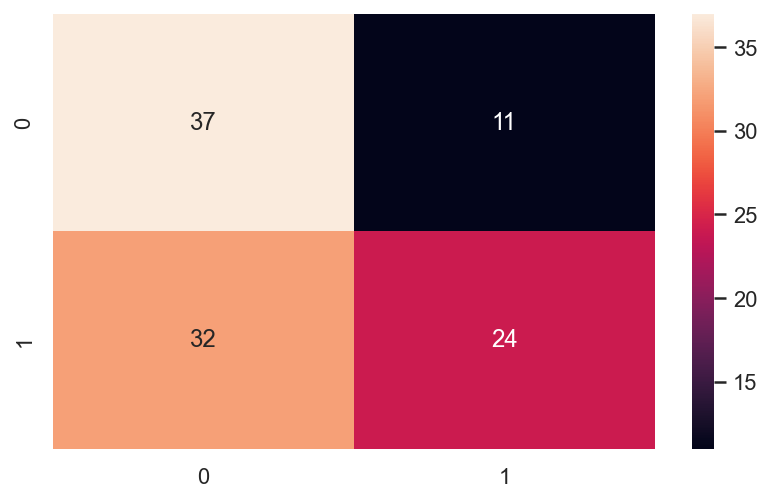

In [345]:
nb = GaussianNB()

#Training set
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
y_pp = nb.predict_proba(X_test)[:, 1]

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))
print('accuracy_score = ', ac)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       372
           1       0.46      0.36      0.41        74

    accuracy                           0.82       446
   macro avg       0.67      0.64      0.65       446
weighted avg       0.81      0.82      0.81       446

accuracy_unseen =  0.8228699551569507


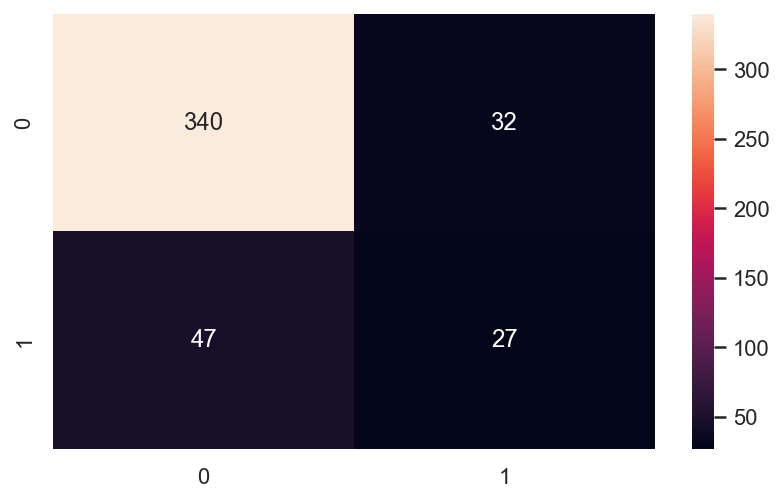

In [346]:
#Unseen set

nb.fit(X_us, y_us)

y_pred_us = nb.predict(X_us)
y_pp_us = nb.predict_proba(X_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');

print(classification_report(y_us, y_pred_us))
print('accuracy_unseen = ', ac_us)

# Random Forest

              precision    recall  f1-score   support

           0       0.63      0.54      0.58        48
           1       0.65      0.73      0.69        56

    accuracy                           0.64       104
   macro avg       0.64      0.64      0.64       104
weighted avg       0.64      0.64      0.64       104

accuracy_score =  0.6442307692307693


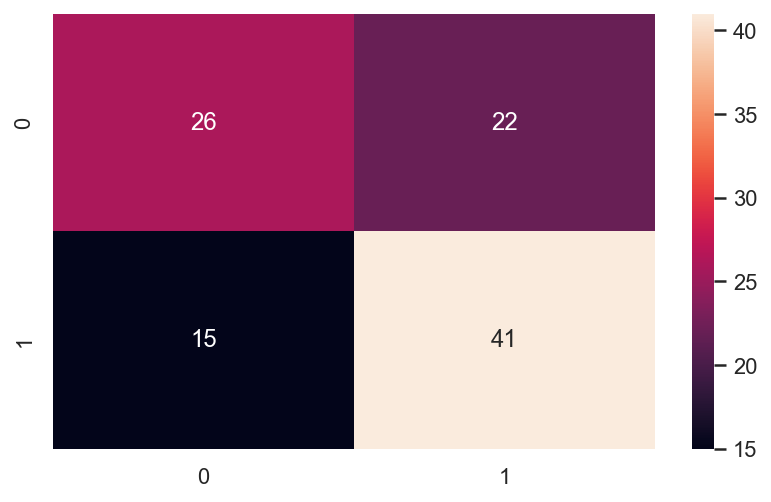

In [347]:
rf = RandomForestClassifier()

#Training set
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pp = rf.predict_proba(X_test)[:, 1]

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))
print('accuracy_score = ', ac)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       372
           1       1.00      1.00      1.00        74

    accuracy                           1.00       446
   macro avg       1.00      1.00      1.00       446
weighted avg       1.00      1.00      1.00       446

accuracy_unseen =  1.0


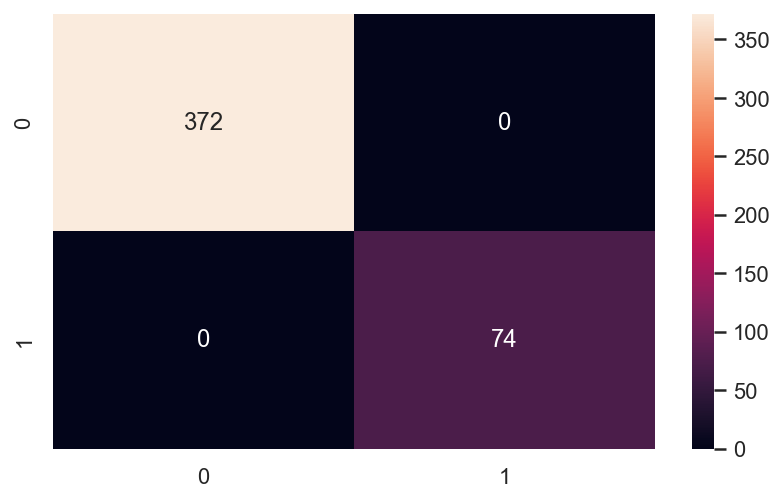

In [348]:
#Unseen set

rf.fit(X_us, y_us)

y_pred_us = rf.predict(X_us)
y_pp_us = rf.predict_proba(X_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');

print(classification_report(y_us, y_pred_us))
print('accuracy_unseen = ', ac_us)

# Using 13 selected features

In [352]:
target = ['response']

features_13 = ['education', 'marital_status', 'income', 'kidhome',
       'recency', 'mntwines', 'mntmeatproducts','mntfishproducts',
       'numdealspurchases', 'numwebpurchases', 'cmpresponse', 'age','mntwinespend']

In [356]:
#Training set

X13 = cpsam[features_13]
y = cpsam[target]

X13_train, X13_test, y_train, y_test = train_test_split(X13, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

scaler.fit(X13_train)

X13_train = scaler.transform(X13_train)
X13_test = scaler.transform(X13_test)


#Unseen set

X13_us = cp1_unseen[features_13]
y_us = cp1_unseen[target]



# Logistic Regression

              precision    recall  f1-score   support

           0       0.64      0.71      0.67        48
           1       0.73      0.66      0.69        56

    accuracy                           0.68       104
   macro avg       0.68      0.68      0.68       104
weighted avg       0.69      0.68      0.68       104

accuracy_test =  0.6826923076923077


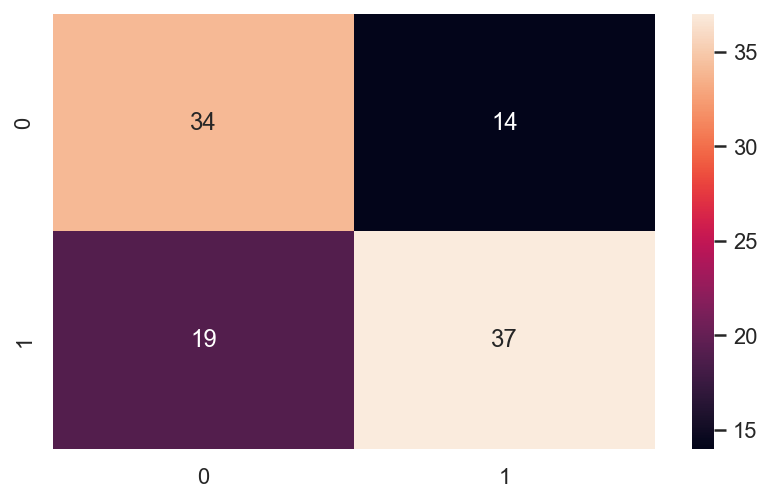

In [354]:

#Training set
lg = LogisticRegression()
lg.fit(X13_train, y_train)

y_pred = lg.predict(X13_test)
y_pp = lg.predict_proba(X13_test)[:, 1]
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))
print('accuracy_test = ', ac)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       372
           1       0.53      0.12      0.20        74

    accuracy                           0.84       446
   macro avg       0.69      0.55      0.55       446
weighted avg       0.80      0.84      0.79       446

accuracy_unseen =  0.8363228699551569


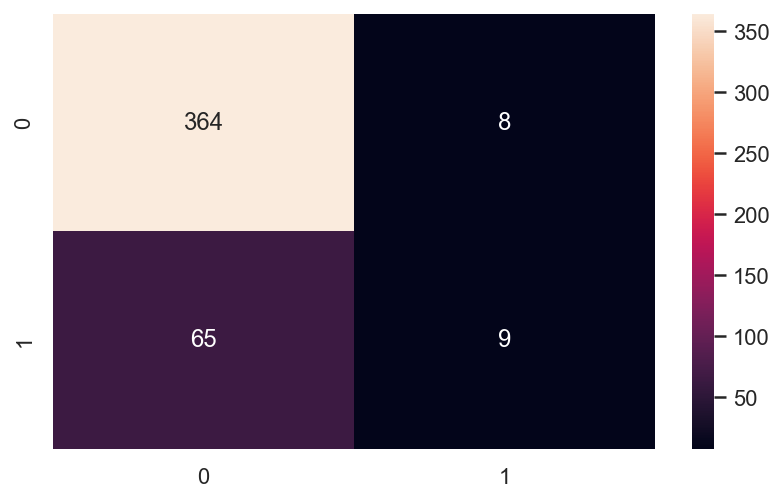

In [357]:
#Unseen set

lg.fit(X13_us, y_us)
y_pred_us = lg.predict(X13_us)
y_pp_us = lg.predict_proba(X13_us)[:, 1]
ac_us = accuracy_score(y_us, y_pred_us)

cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');

print(classification_report(y_us, y_pred_us))
print('accuracy_unseen = ', ac_us)

# Support Vector Machine

              precision    recall  f1-score   support

           0       0.62      0.69      0.65        48
           1       0.71      0.64      0.67        56

    accuracy                           0.66       104
   macro avg       0.66      0.67      0.66       104
weighted avg       0.67      0.66      0.66       104

accuracy_test =  0.6634615384615384


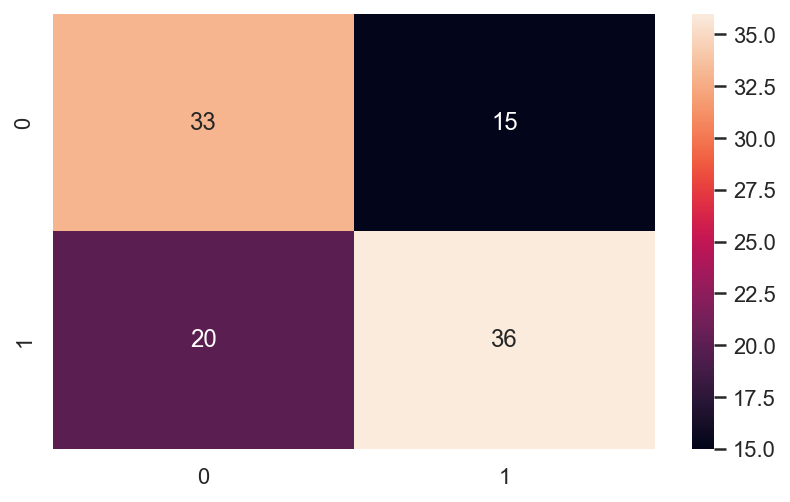

In [358]:
#Training set
svm = SVC(kernel='linear', probability=True, max_iter=1000)
svm.fit(X13_train, y_train)

y_pred = svm.predict(X13_test)
y_pp = svm.predict_proba(X13_test)[:, 1]

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))
print('accuracy_test = ', ac)

              precision    recall  f1-score   support

           0       0.81      0.28      0.42       372
           1       0.16      0.68      0.26        74

    accuracy                           0.35       446
   macro avg       0.49      0.48      0.34       446
weighted avg       0.71      0.35      0.39       446

accuracy_unseen =  0.3475336322869955


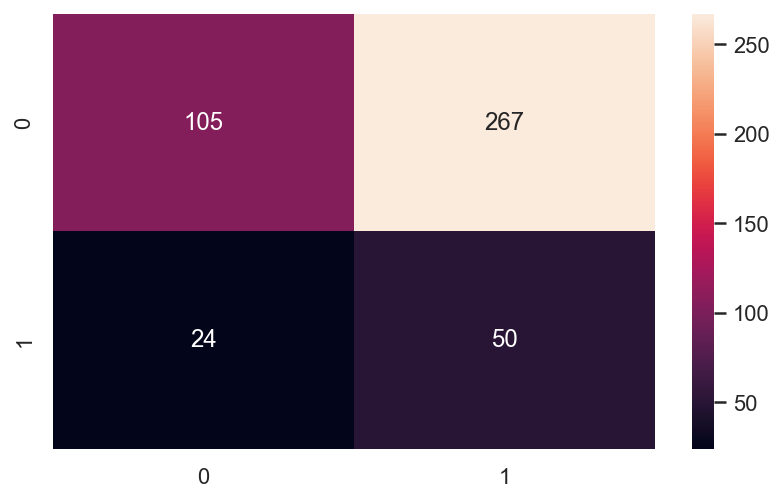

In [359]:
#Unseen set

svm.fit(X13_us, y_us)

y_pred_us = svm.predict(X13_us)
y_pp_us = svm.predict_proba(X13_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');

print(classification_report(y_us, y_pred_us))
print('accuracy_unseen = ', ac_us)

# Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.55      0.65      0.60        48
           1       0.65      0.55      0.60        56

    accuracy                           0.60       104
   macro avg       0.60      0.60      0.60       104
weighted avg       0.60      0.60      0.60       104

accuracy_score =  0.5961538461538461


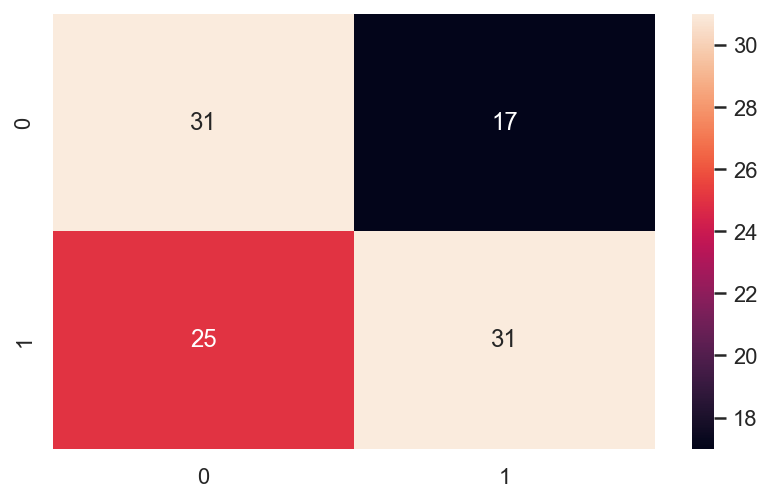

In [360]:
nb = GaussianNB()

#Training set
nb.fit(X13_train, y_train)

y_pred = nb.predict(X13_test)
y_pp = nb.predict_proba(X13_test)[:, 1]

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))
print('accuracy_score = ', ac)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       372
           1       0.39      0.45      0.42        74

    accuracy                           0.79       446
   macro avg       0.64      0.65      0.64       446
weighted avg       0.80      0.79      0.80       446

accuracy_unseen =  0.7914798206278026


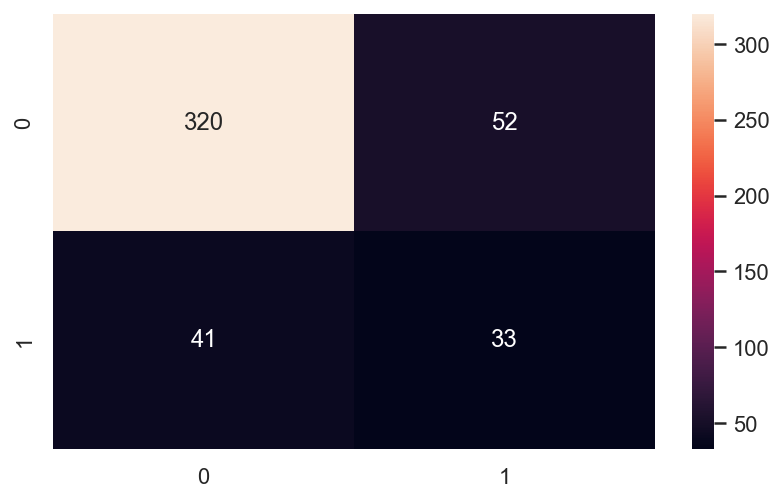

In [361]:
#Unseen set

nb.fit(X13_us, y_us)

y_pred_us = nb.predict(X13_us)
y_pp_us = nb.predict_proba(X13_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');

print(classification_report(y_us, y_pred_us))
print('accuracy_unseen = ', ac_us)

# Random Forest

              precision    recall  f1-score   support

           0       0.62      0.69      0.65        48
           1       0.71      0.64      0.67        56

    accuracy                           0.66       104
   macro avg       0.66      0.67      0.66       104
weighted avg       0.67      0.66      0.66       104

accuracy_score =  0.6634615384615384


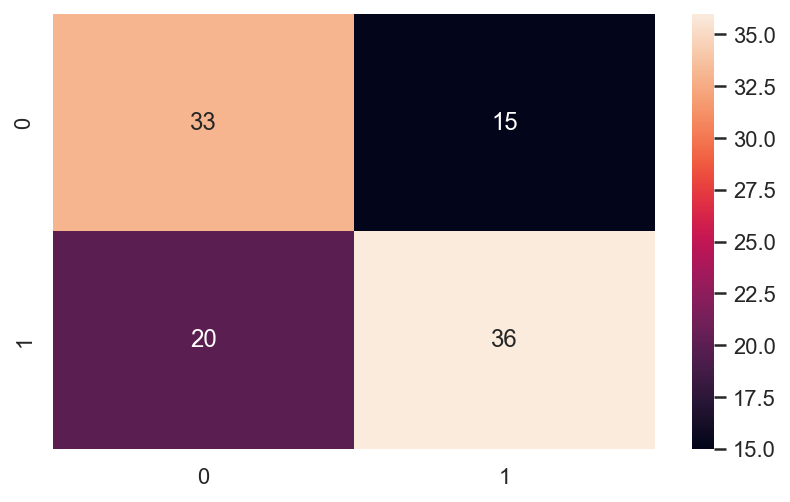

In [362]:
rf = RandomForestClassifier()

#Training set
rf.fit(X13_train, y_train)

y_pred = rf.predict(X13_test)
y_pp = rf.predict_proba(X13_test)[:, 1]

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))
print('accuracy_score = ', ac)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       372
           1       1.00      1.00      1.00        74

    accuracy                           1.00       446
   macro avg       1.00      1.00      1.00       446
weighted avg       1.00      1.00      1.00       446

accuracy_unseen =  1.0


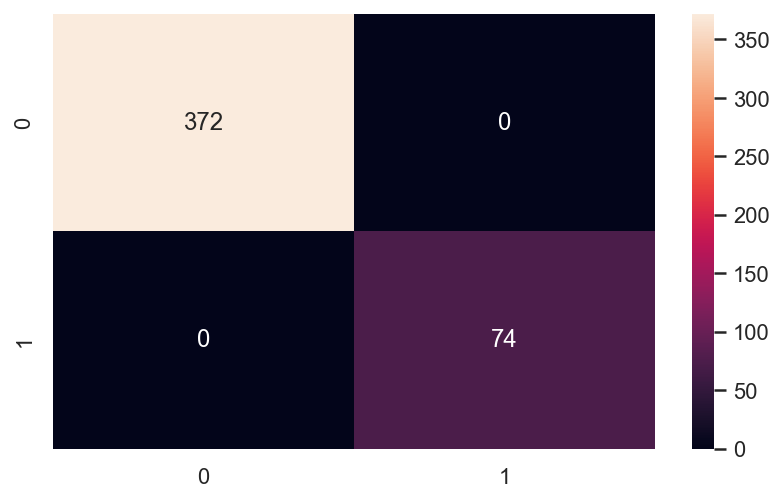

In [363]:
#Unseen set

rf.fit(X13_us, y_us)

y_pred_us = rf.predict(X13_us)
y_pp_us = rf.predict_proba(X13_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');

print(classification_report(y_us, y_pred_us))
print('accuracy_unseen = ', ac_us)

In [364]:
cp1_unseen[cp1_unseen['response']==1].shape

(74, 27)

# Conclusion
### Random Forest given 100% accuracy score when use 13 features and 5 features.
### We will choose Random Forest model for deployment